In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
from datetime import datetime
import plotly.express as px

In [2]:
import os
print(os.listdir()) 
os.chdir('C:/Users/priya/OneDrive/Desktop/Spring 23/Spring 24/Data Analytics/Project/Data')


['.ipynb_checkpoints', 'BAN_612_Final Code_With all Models.ipynb', 'Case 1', 'Code Assignment 2_hy1162.ipynb', 'Data Cleaning - Part 1.ipynb', 'Data Cleaning Part 2.ipynb', 'Data Preprocessing.ipynb', 'Data Visualization - Bokeh.ipynb', 'Data Visualization - Matplotlib - Solution.ipynb', 'Data Visualization - Plotly.ipynb', 'Data Visualization - Seaborn .ipynb', 'DatViz.ipynb', 'Final BAN612.ipynb', 'Getting Data with the Last.fm API .ipynb', 'Gradient Descent Lecture.ipynb', 'Gradient Descent Lecture_Solution_WithNote-1.ipynb', 'gradient-descent-linear-and-logistic.ipynb', 'In-class Test 1 - Answers.ipynb', 'Lecture_Data Loading_Solution.ipynb', 'Lecture_NumPy.ipynb', 'Lecture_pandas_Solution.ipynb', 'Linear_Regression - Fitting Linear to Data.ipynb', 'LR and GD.ipynb', 'LR and Regularization.ipynb', 'Preliminary Report_BAN612.ipynb', 'Python Basics_Part 1.ipynb', 'Python Basics_Part 2.ipynb', 'Python Basics_Part 3.ipynb', 'Sample files', 'Self_Test_Python Basics-Solution.ipynb', 'Sen

# Loading the Data files

In [3]:
#data1 = pd.read_csv('2021VAERSDATA.csv')
#data1 = pd.read_csv('2021VAERSDATA.csv', encoding='utf-8', errors='ignore')
#data1 = pd.read_csv('2021VAERSDATA.csv')
data1 = pd.read_csv('2021VAERSDATA.csv', encoding='latin-1')
vac1 = pd.read_csv('2021VAERSVAX.csv' , encoding='latin-1')
symp = pd.read_csv('2021VAERSSYMPTOMS.csv', encoding='latin-1')

In [4]:
print("VAERS Patient Data 2021 shape:", data1.shape)
print("VAERS Vaccine Data 2021 shape:", vac1.shape)
print("VAERS Symptoms Data 2021 shape:", symp.shape)

VAERS Patient Data 2021 shape: (753045, 35)
VAERS Vaccine Data 2021 shape: (797163, 8)
VAERS Symptoms Data 2021 shape: (1004110, 11)


# Merging the files together

In [5]:
# Merging data file and Vax
data_vac1 = vac1.merge(data1, how='left', on = 'VAERS_ID')

# Merging data_vac1 with symptom file
data_vac_symp = symp.merge(data_vac1,how='left', on='VAERS_ID')

data_vac_symp.shape

(1070518, 52)

In [6]:

merged_data = pd.merge(data1, vac1, on='VAERS_ID')
merged_data = pd.merge(merged_data, symp, on='VAERS_ID')

merged_data.shape

(1070518, 52)

# Filtering only the vaccinations in the first Quarter of 2021

In [7]:
# Convert the 'RECVDATE' column to datetime format
merged_data['RECVDATE'] = pd.to_datetime(merged_data['RECVDATE'])

# Filter the DataFrame to include only the data from the first three months of the year
merged_data = merged_data[(merged_data['RECVDATE'].dt.month >= 1) & (merged_data['RECVDATE'].dt.month <= 3)]


In [8]:
merged_data.shape

(292219, 52)

In [9]:
merged_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,2021-01-01,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,2021-01-01,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,2021-01-01,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,2021-01-01,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,2021-01-01,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [8]:
# Stripping out spaces from ends of names, and replacing internal spaces with "_"
print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
data_vac_symp.columns = [col.strip().replace(' ', '_').lower() for col in data_vac_symp.columns]
data_vac_symp.columns = [col.strip().replace('-', '_').lower() for col in data_vac_symp.columns]
# Print edited column names
print("\nNew Column Names:\n", data_vac_symp.columns)


Stripping spaces from ends of column names; replacing internal spaces with '_'


New Column Names:
 Index(['vaers_id', 'symptom1', 'symptomversion1', 'symptom2',
       'symptomversion2', 'symptom3', 'symptomversion3', 'symptom4',
       'symptomversion4', 'symptom5', 'symptomversion5', 'vax_type',
       'vax_manu', 'vax_lot', 'vax_dose_series', 'vax_route', 'vax_site',
       'vax_name', 'recvdate', 'state', 'age_yrs', 'cage_yr', 'cage_mo', 'sex',
       'rpt_date', 'symptom_text', 'died', 'datedied', 'l_threat', 'er_visit',
       'hospital', 'hospdays', 'x_stay', 'disable', 'recovd', 'vax_date',
       'onset_date', 'numdays', 'lab_data', 'v_adminby', 'v_fundby',
       'other_meds', 'cur_ill', 'history', 'prior_vax', 'splttype',
       'form_vers', 'todays_date', 'birth_defect', 'ofc_visit', 'er_ed_visit',
       'allergies'],
      dtype='object')


In [11]:
import numpy as np

# Missing Values

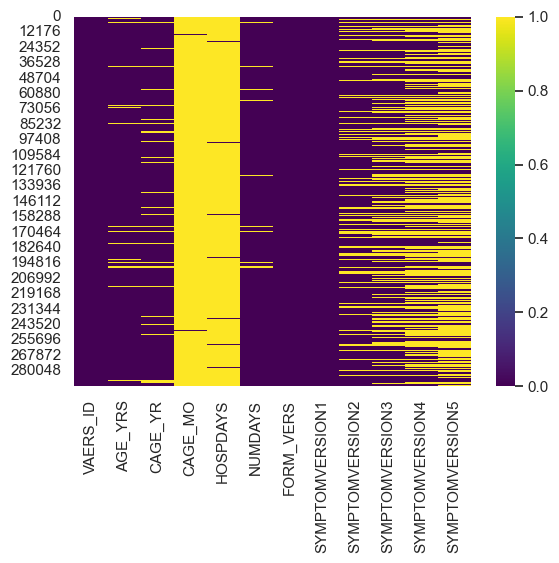

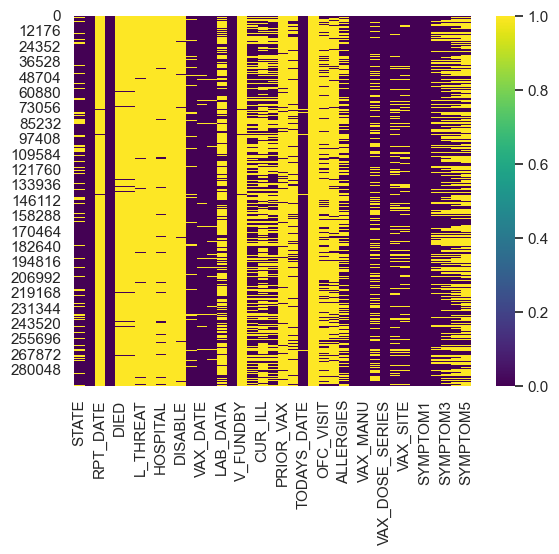

In [12]:
# Select all numerical and categorical columns
num_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = merged_data.select_dtypes(include=['object']).columns

# Create a heatmap of missing values using Seaborn for numerical columns
sns.heatmap(merged_data[num_cols].isnull(), cmap='viridis')

# Show the heatmap for numerical columns
plt.show()

# Create a heatmap of missing values using Seaborn for categorical columns
sns.heatmap(merged_data[cat_cols].isnull(), cmap='viridis')

# Show the heatmap for categorical columns
plt.show()



In [9]:
num_missing = merged_data.isna().sum()
num_missing[:]

VAERS_ID                0
RECVDATE                0
STATE               45711
AGE_YRS             13892
CAGE_YR             27959
CAGE_MO            289767
SEX                     0
RPT_DATE           291529
SYMPTOM_TEXT          140
DIED               288175
DATEDIED           288450
L_THREAT           287887
ER_VISIT           292139
HOSPITAL           277645
HOSPDAYS           281806
X_STAY             292057
DISABLE            289110
RECOVD              23488
VAX_DATE             6744
ONSET_DATE           8662
NUMDAYS             14142
LAB_DATA           193584
V_ADMINBY               0
V_FUNDBY           291483
OTHER_MEDS         113569
CUR_ILL            195754
HISTORY            124821
PRIOR_VAX          272399
SPLTTYPE           258422
FORM_VERS               0
TODAYS_DATE          2115
BIRTH_DEFECT       292074
OFC_VISIT          237760
ER_ED_VISIT        253601
ALLERGIES          135757
VAX_TYPE                0
VAX_MANU                0
VAX_LOT             88082
VAX_DOSE_SER

In [9]:
pct_missing = merged_data.isna().mean()
pct_missing

In [10]:
merged_data.shape

(52,)

# Dropping insignificant columns

In [10]:
# dropping these columns as they have very less significance and are having more than 90% missing values
#CAGE_MO,RPT_DATE,OFC_VISIT,V_FUNDBY
D=['CAGE_MO','RPT_DATE','OFC_VISIT','V_FUNDBY','VAERS_ID']

# Drop the specified columns
merged_data.drop(columns=D, inplace=True)

In [21]:
merged_data[merged_data.duplicated()]

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
3727,919453,2021-01-04,CA,49.0,49.0,NaN,F,NaN,"Right wrist rash, 4cm x 2.5cm, with vesicles t...",NaN,...,Hypoaesthesia oral,23.1,Paraesthesia,23.1,Paraesthesia oral,23.1,Rash,23.1,Rash papular,23.1
3728,919453,2021-01-04,CA,49.0,49.0,NaN,F,NaN,"Right wrist rash, 4cm x 2.5cm, with vesicles t...",NaN,...,Rash pruritic,23.1,Rash vesicular,23.1,NaN,NaN,NaN,NaN,NaN,NaN
5186,920671,2021-01-05,AZ,62.0,62.0,NaN,F,NaN,Left arm itchy and red.,NaN,...,Erythema,24.0,Pruritus,24.0,NaN,NaN,NaN,NaN,NaN,NaN
5188,920671,2021-01-05,AZ,62.0,62.0,NaN,F,NaN,Left arm itchy and red.,NaN,...,Erythema,24.0,Pruritus,24.0,NaN,NaN,NaN,NaN,NaN,NaN
5190,920671,2021-01-05,AZ,62.0,62.0,NaN,F,NaN,Left arm itchy and red.,NaN,...,Erythema,24.0,Pruritus,24.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288652,1151048,2021-03-31,IL,NaN,NaN,NaN,U,NaN,"ROTATEQ, PEDV AX HIB, RECOMBIV AX HB, GARDASIL...",NaN,...,No adverse event,24.0,Product storage error,24.0,NaN,NaN,NaN,NaN,NaN,NaN
289063,1151369,2021-03-31,NaN,NaN,NaN,NaN,F,NaN,Noted with soreness at injection site; abdomin...,NaN,...,Abdominal pain,23.1,Vaccination site pain,23.1,NaN,NaN,NaN,NaN,NaN,NaN
291890,1154816,2021-03-31,TN,52.0,52.0,NaN,M,NaN,One of our medics vaccinated an individual wit...,NaN,...,Chills,24.0,Expired product administered,24.0,Fatigue,24.0,Headache,24.0,Night sweats,24.0
291891,1154816,2021-03-31,TN,52.0,52.0,NaN,M,NaN,One of our medics vaccinated an individual wit...,NaN,...,Pain,24.0,Pyrexia,24.0,NaN,NaN,NaN,NaN,NaN,NaN


# Dropping Duplicate Values

In [11]:
merged_data=merged_data.drop_duplicates()

In [12]:
# Fill NaN values
merged_data.fillna((0), inplace = True)

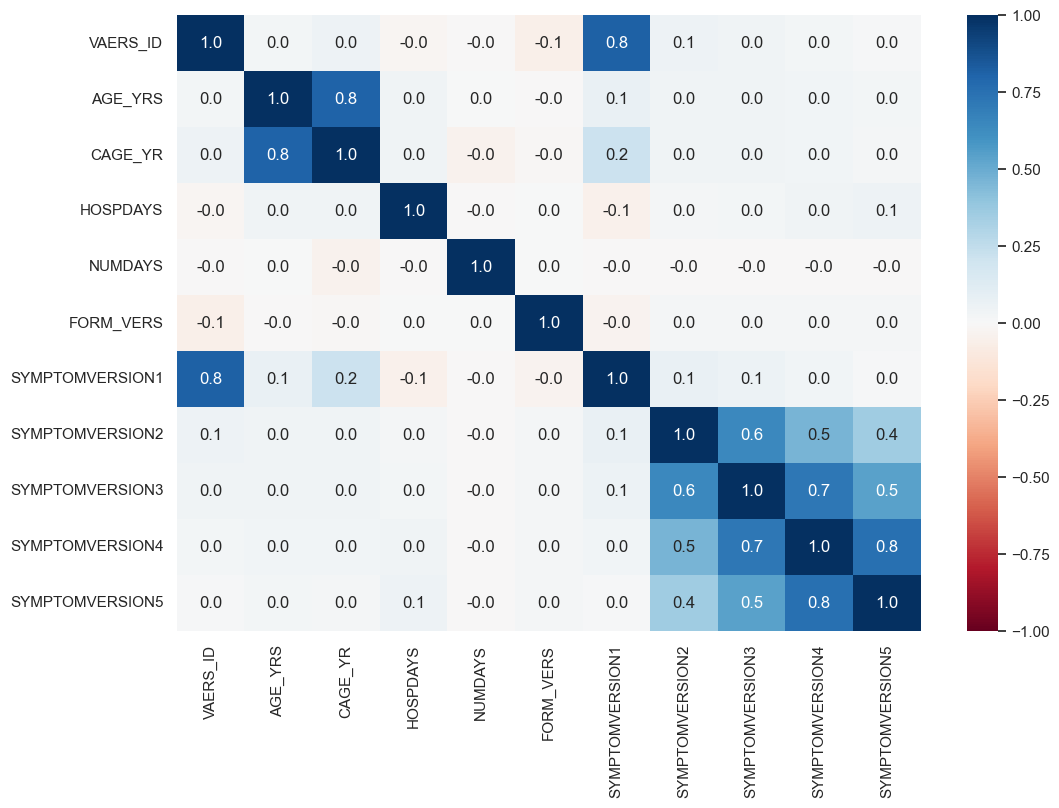

In [28]:
num_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns
corr = merged_data[num_cols].corr()
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.heatmap(corr, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap="RdBu", center=0, ax=ax)

plt.show()

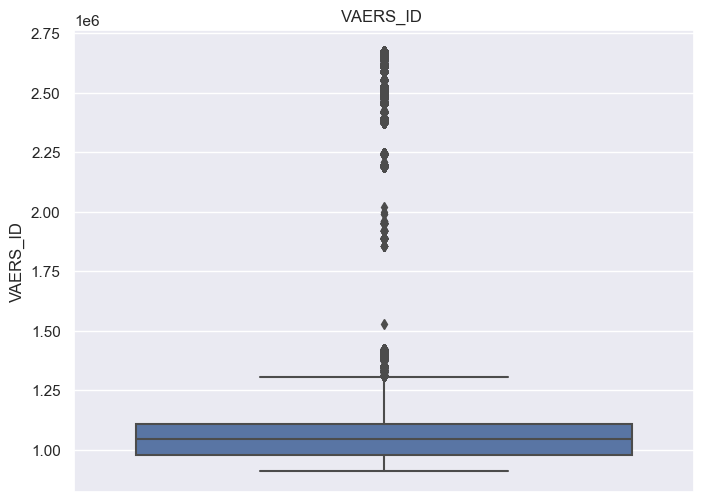

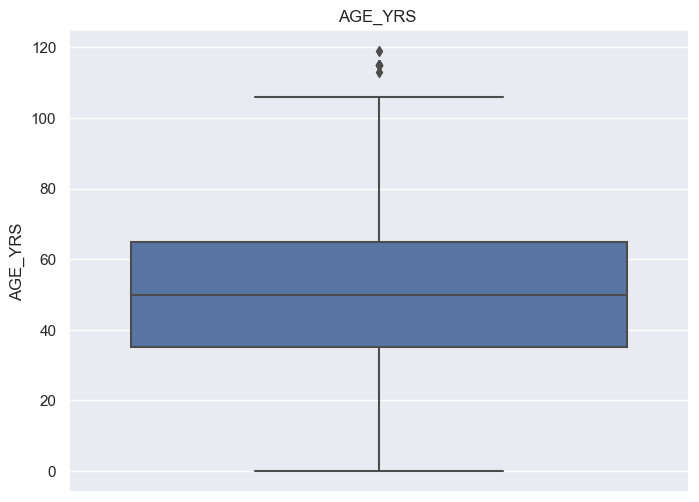

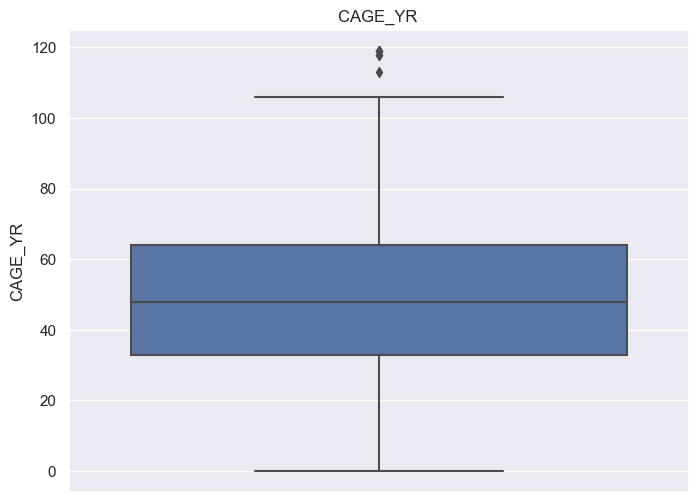

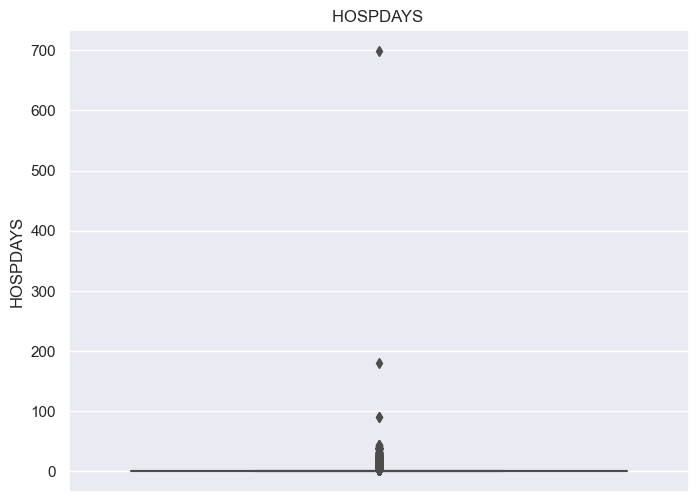

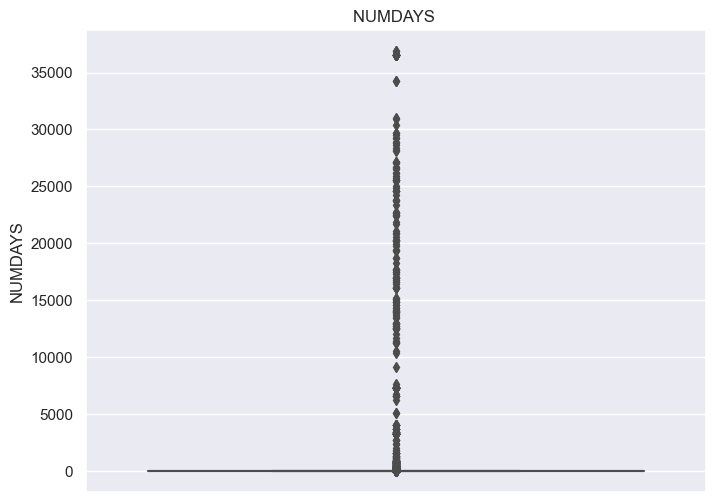

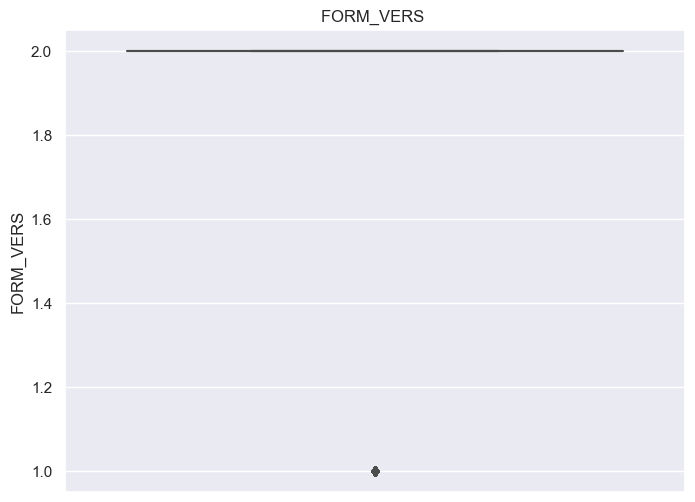

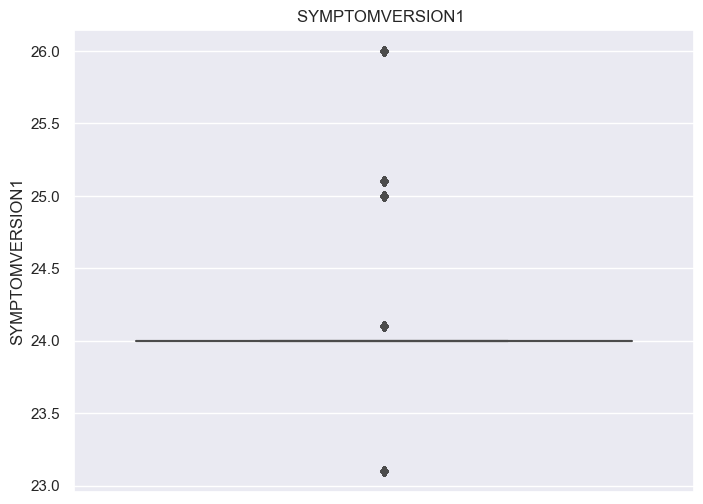

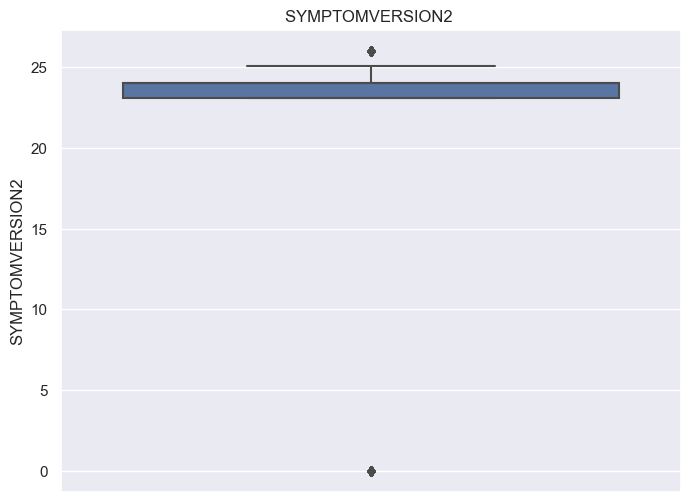

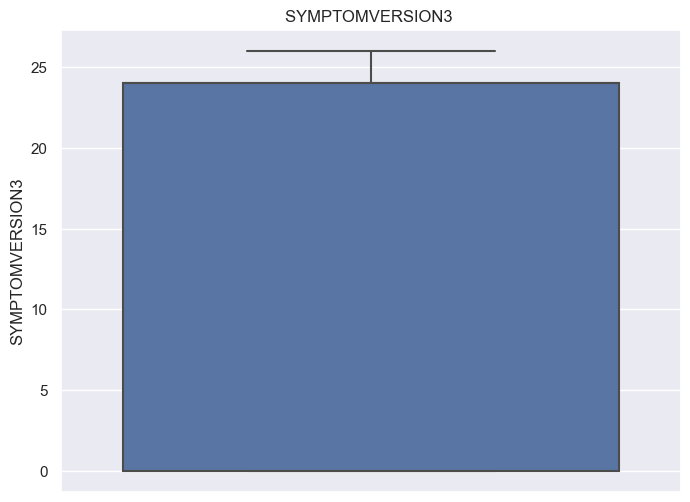

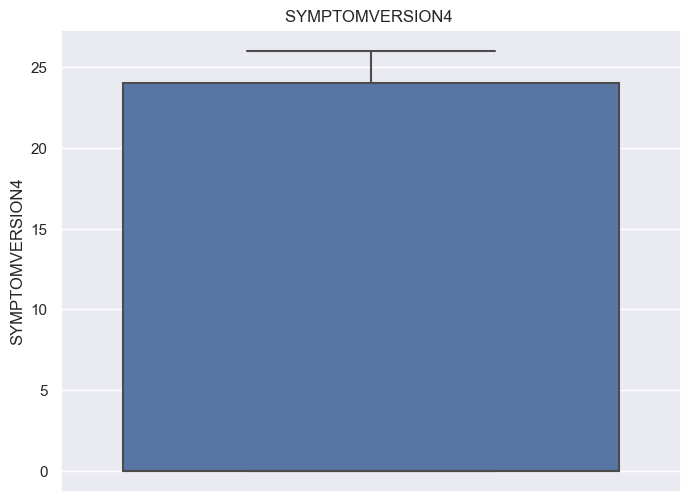

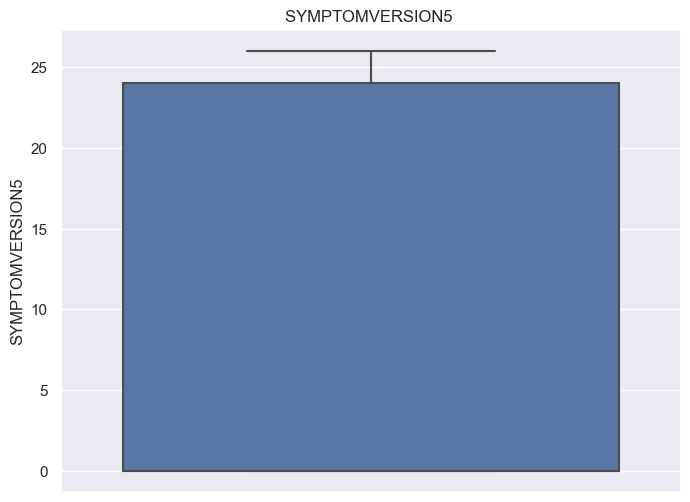

In [29]:
num_cols = merged_data.select_dtypes(include=['float64', 'int64'])

# Create box plots for each numerical variable
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot( y=col, data=merged_data)
    plt.title(f"{col} ")
    plt.show()

In [30]:
merged_data.describe()

,VAERS_ID,RECVDATE,AGE_YRS,CAGE_YR,HOSPDAYS,NUMDAYS,FORM_VERS,SYMPTOMVERSION1,SYMPTOMVERSION2,SYMPTOMVERSION3,SYMPTOMVERSION4,SYMPTOMVERSION5
count,2.922190e+05,292219,292219.000000,292219.000000,292219.000000,292219.000000,292219.000000,292219.000000,292219.000000,292219.000000,292219.000000,292219.000000
mean,1.146872e+06,2021-02-15 16:24:51.746943232,49.016211,46.289423,0.156034,18.457017,1.997481,23.964867,19.270844,15.152319,11.313868,8.098974
min,9.106420e+05,2021-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,23.100000,0.000000,0.000000,0.000000,0.000000
25%,9.787565e+05,2021-01-25 00:00:00,35.000000,33.000000,0.000000,0.000000,2.000000,24.000000,23.100000,0.000000,0.000000,0.000000
50%,1.044387e+06,2021-02-13 00:00:00,50.000000,48.000000,0.000000,1.000000,2.000000,24.000000,24.000000,24.000000,0.000000,0.000000
75%,1.109963e+06,2021-03-11 00:00:00,65.000000,64.000000,0.000000,2.000000,2.000000,24.000000,24.000000,24.000000,24.000000,24.000000
max,2.675503e+06,2021-03-31 00:00:00,119.000000,119.000000,699.000000,36896.000000,2.000000,26.000000,26.000000,26.000000,26.000000,26.000000
std,4.011228e+05,NaN,20.770355,22.922905,1.805114,621.316201,0.050123,0.578524,9.533326,11.571822,11.974571,11.338847


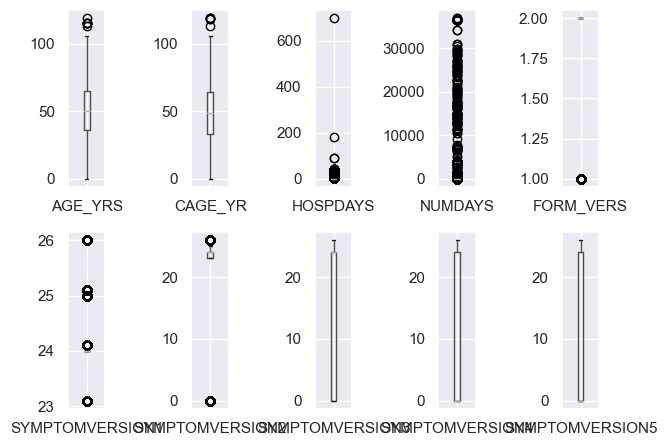

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=5)

merged_data.boxplot(column='AGE_YRS', ax=axes[0,0])
merged_data.boxplot(column='CAGE_YR',  ax=axes[0,1])
merged_data.boxplot(column='HOSPDAYS', ax=axes[0,2])
merged_data.boxplot(column='NUMDAYS', ax=axes[0,3])
merged_data.boxplot(column='FORM_VERS', ax=axes[0,4])
merged_data.boxplot(column='SYMPTOMVERSION1', ax=axes[1,0])
merged_data.boxplot(column='SYMPTOMVERSION2', ax=axes[1,1])
merged_data.boxplot(column='SYMPTOMVERSION3', ax=axes[1,2])
merged_data.boxplot(column='SYMPTOMVERSION4', ax=axes[1,3])
merged_data.boxplot(column='SYMPTOMVERSION5', ax=axes[1,4])

plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

In [13]:
cat_cols = merged_data.select_dtypes(include=['object']).columns
cat_cols

Index(['STATE', 'SEX', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY', 'OTHER_MEDS', 'CUR_ILL',
       'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'TODAYS_DATE', 'BIRTH_DEFECT',
       'ER_ED_VISIT', 'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT',
       'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1',
       'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'],
      dtype='object')

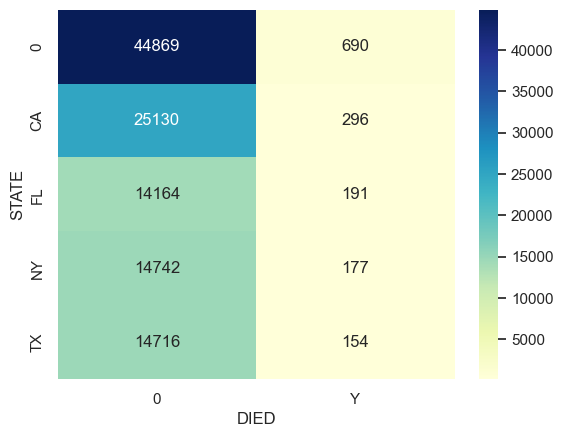

In [27]:
# Filter the DataFrame to include only the top 5 VAX_MANU values
top_vax_manu = merged_data['STATE'].value_counts().nlargest(5).index
filtered_data = merged_data[merged_data['STATE'].isin(top_vax_manu)]

# Group the filtered data by 'VAX_MANU' and 'DIED', and calculate the count
grouped = filtered_data.groupby(['STATE', 'DIED']).size().reset_index(name='Count')

# Pivot the data to create a heatmap
heatmap_data = grouped.pivot(index='STATE', columns='DIED', values='Count')

# Create the heatmap using seaborn
ax = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')


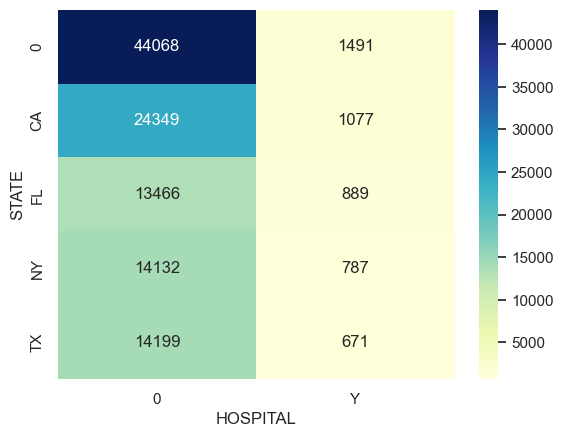

In [28]:
# Filter the DataFrame to include only the top 5 VAX_MANU values
top_vax_manu = merged_data['STATE'].value_counts().nlargest(5).index
filtered_data = merged_data[merged_data['STATE'].isin(top_vax_manu)]

# Group the filtered data by 'VAX_MANU' and 'DIED', and calculate the count
grouped = filtered_data.groupby(['STATE', 'HOSPITAL']).size().reset_index(name='Count')

# Pivot the data to create a heatmap
heatmap_data = grouped.pivot(index='STATE', columns='HOSPITAL', values='Count')

# Create the heatmap using seaborn
ax = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')


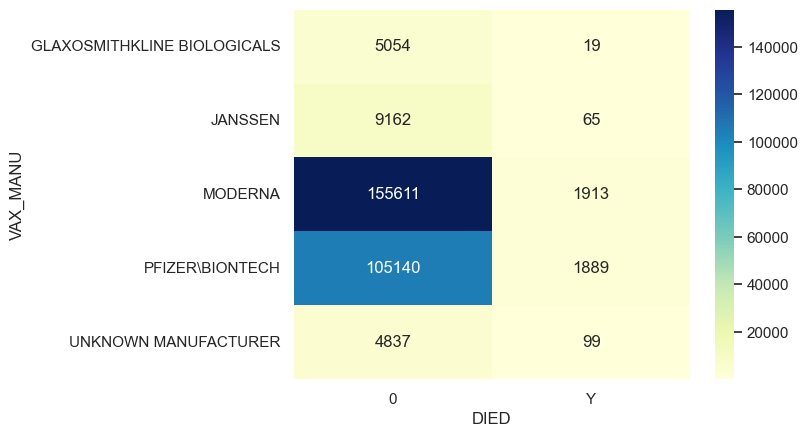

In [26]:
# Filter the DataFrame to include only the top 5 VAX_MANU values
top_vax_manu = merged_data['VAX_MANU'].value_counts().nlargest(5).index
filtered_data = merged_data[merged_data['VAX_MANU'].isin(top_vax_manu)]

# Group the filtered data by 'VAX_MANU' and 'DIED', and calculate the count
grouped = filtered_data.groupby(['VAX_MANU', 'DIED']).size().reset_index(name='Count')

# Pivot the data to create a heatmap
heatmap_data = grouped.pivot(index='VAX_MANU', columns='DIED', values='Count')

# Create the heatmap using seaborn
ax = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')


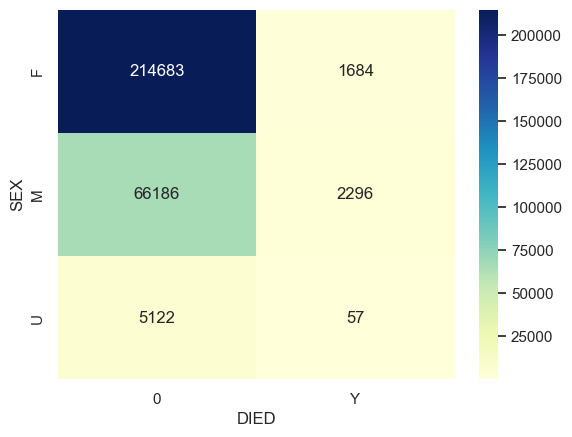

In [30]:
# Filter the DataFrame to include only the top 5 VAX_MANU values
top_vax_manu = merged_data['SEX'].value_counts().nlargest(5).index
filtered_data = merged_data[merged_data['SEX'].isin(top_vax_manu)]

# Group the filtered data by 'VAX_MANU' and 'DIED', and calculate the count
grouped = filtered_data.groupby(['SEX', 'DIED']).size().reset_index(name='Count')

# Pivot the data to create a heatmap
heatmap_data = grouped.pivot(index='SEX', columns='DIED', values='Count')

# Create the heatmap using seaborn
ax = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')


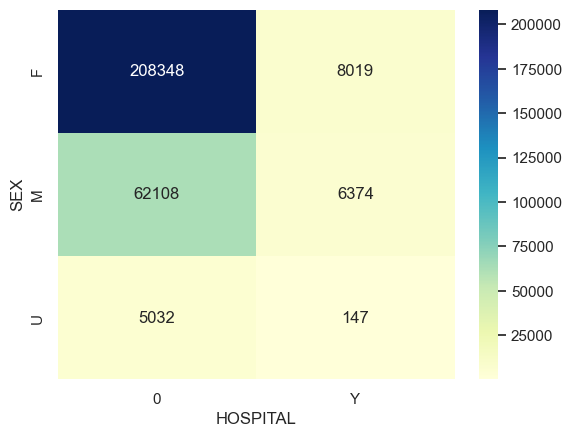

In [31]:
# Filter the DataFrame to include only the top 5 VAX_MANU values
top_vax_manu = merged_data['SEX'].value_counts().nlargest(5).index
filtered_data = merged_data[merged_data['SEX'].isin(top_vax_manu)]

# Group the filtered data by 'VAX_MANU' and 'DIED', and calculate the count
grouped = filtered_data.groupby(['SEX', 'HOSPITAL']).size().reset_index(name='Count')

# Pivot the data to create a heatmap
heatmap_data = grouped.pivot(index='SEX', columns='HOSPITAL', values='Count')

# Create the heatmap using seaborn
ax = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')


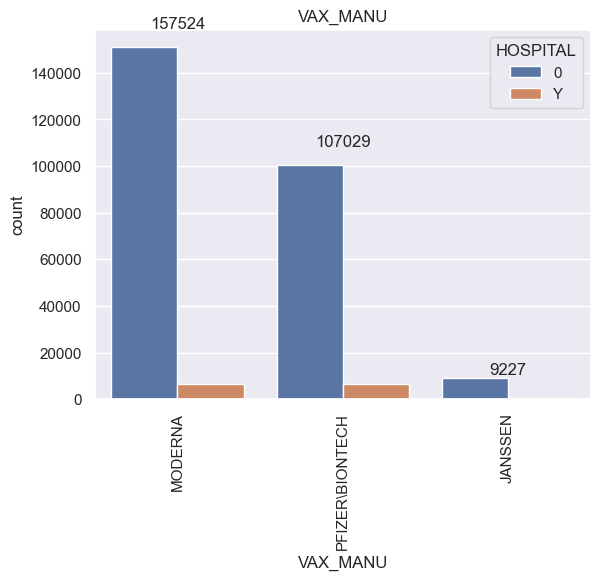

In [41]:
def sns_countplot(feature):
    # Calculate aggregate counts for each category
    aggregate_counts = merged_data[feature].value_counts().iloc[:3]
    
    # Create the countplot
    sns.countplot(x=feature, data=merged_data, hue="HOSPITAL", order=aggregate_counts.index)
    
    # Annotate the count values above the bars
    for index, value in enumerate(aggregate_counts):
        plt.text(index, value + 1, str(value), ha='center', va='bottom')
    
    plt.xticks(rotation=90)
    plt.title('VAX_MANU')
    plt.show()

sns_countplot('VAX_MANU')


In [ ]:
[LAB_DATA','OTHER_MEDS','CUR_ILL','HISTORY','PRIOR_VAX','SPLTTYPE','TODAYS_DATE','ALLERGIES','VAX_LOT','SYMPTOM1','SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']

In [ ]:
#Encoding Categorical variables

In [17]:
merged_data['VAX_MANU'].unique()

array(['MODERNA', 'PFIZER\\BIONTECH', 'SEQIRUS, INC.',
       'GLAXOSMITHKLINE BIOLOGICALS', 'MERCK & CO. INC.', 'PFIZER\\WYETH',
       'UNKNOWN MANUFACTURER', 'SANOFI PASTEUR',
       'NOVARTIS VACCINES AND DIAGNOSTICS',
       'PROTEIN SCIENCES CORPORATION', 'EMERGENT BIOSOLUTIONS',
       'MEDIMMUNE VACCINES, INC.', 'TEVA PHARMACEUTICALS',
       'DYNAVAX TECHNOLOGIES CORPORATION', 'PAXVAX',
       'MASS. PUB HLTH BIOL LAB', 'BERNA BIOTECH, LTD.', 'CSL LIMITED',
       'INTERCELL AG', 'PASTEUR MERIEUX CONNAUGHT', 'JANSSEN'],
      dtype=object)

In [13]:
merged_data['ER_ED_VISIT'].unique()
merged_data.ER_ED_VISIT.replace({"Y":1}, inplace= True)
merged_data['ER_ED_VISIT'].value_counts()

ER_ED_VISIT
0    251489
1     38539
Name: count, dtype: int64

In [14]:
merged_data['BIRTH_DEFECT'].unique()
merged_data.BIRTH_DEFECT.replace({"Y":1}, inplace= True)
merged_data['BIRTH_DEFECT'].value_counts()

BIRTH_DEFECT
0    289884
1       144
Name: count, dtype: int64

In [15]:
merged_data['DISABLE'].unique()
merged_data.DISABLE.replace({"Y":1}, inplace= True)
merged_data['DISABLE'].value_counts()


DISABLE
0    286921
1      3107
Name: count, dtype: int64

In [16]:
merged_data['X_STAY'].unique()
merged_data.X_STAY.replace({"Y":1}, inplace= True)
merged_data['X_STAY'].value_counts()

X_STAY
0    289871
1       157
Name: count, dtype: int64

In [17]:
merged_data['ER_VISIT'].unique()
merged_data.ER_VISIT.replace({"Y":1}, inplace= True)
merged_data['ER_VISIT'].value_counts()

ER_VISIT
0    289948
1        80
Name: count, dtype: int64

In [18]:
merged_data['DIED'].unique()
#encoding died column:
merged_data.DIED.replace({"Y":1}, inplace= True)
merged_data['DIED'].value_counts()

DIED
0    285991
1      4037
Name: count, dtype: int64

In [19]:
# Encoding the hospital column
merged_data.HOSPITAL.replace({"Y":1}, inplace= True)
merged_data['HOSPITAL'].value_counts()

HOSPITAL
0    275488
1     14540
Name: count, dtype: int64

In [20]:
# Encoding L_THREAT column
merged_data['L_THREAT'].unique()
merged_data.L_THREAT.replace({"Y":1}, inplace= True)
merged_data['L_THREAT'].value_counts()

L_THREAT
0    285702
1      4326
Name: count, dtype: int64

In [21]:
merged_data.columns

Index(['RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'SEX', 'SYMPTOM_TEXT',
       'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS',
       'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS',
       'LAB_DATA', 'V_ADMINBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY',
       'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT',
       'ER_ED_VISIT', 'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT',
       'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1',
       'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3',
       'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5',
       'SYMPTOMVERSION5'],
      dtype='object')

# Combining Rare Categories (with count less than 1000)

In [22]:
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    merged_data[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

cat_cols=['STATE','SEX', 'RECOVD','V_ADMINBY','VAX_TYPE','VAX_MANU','VAX_DOSE_SERIES','VAX_ROUTE','VAX_SITE','VAX_NAME']
# lets apply this functino to our data with mincount=1000. You can try lowering this cut-off too!                    
CombineRareCategories(merged_data[cat_cols], 1000) 

In [23]:
# dropping these columns as they have very less significance and are having more than 90% missing values
#CAGE_MO,RPT_DATE,OFC_VISIT,V_FUNDBY
D=['SYMPTOMVERSION1','SYMPTOMVERSION2','SYMPTOMVERSION3','SYMPTOMVERSION4','SYMPTOMVERSION5','RECVDATE']

# Drop the specified columns
merged_data.drop(columns=D, inplace=True)

In [23]:
merged_data.describe()

,AGE_YRS,CAGE_YR,DIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,NUMDAYS,FORM_VERS,BIRTH_DEFECT,ER_ED_VISIT
count,290028.000000,290028.000000,290028.000000,290028.000000,290028.000000,290028.000000,290028.000000,290028.000000,290028.000000,290028.000000,290028.000000,290028.000000,290028.000000
mean,49.284179,46.538576,0.013919,0.014916,0.000276,0.050133,0.157026,0.000541,0.010713,18.568945,1.997473,0.000497,0.132880
std,20.505376,22.729868,0.117156,0.121216,0.016606,0.218220,1.811483,0.023260,0.102947,623.629875,0.050209,0.022277,0.339446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,36.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,50.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
75%,65.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
max,119.000000,119.000000,1.000000,1.000000,1.000000,1.000000,699.000000,1.000000,1.000000,36896.000000,2.000000,1.000000,1.000000


In [29]:
new_cols=['STATE','SEX', 'RECOVD','V_ADMINBY','VAX_TYPE','VAX_MANU','VAX_DOSE_SERIES','VAX_ROUTE','VAX_SITE','VAX_NAME']

# Bar plots for Numerical Predictors

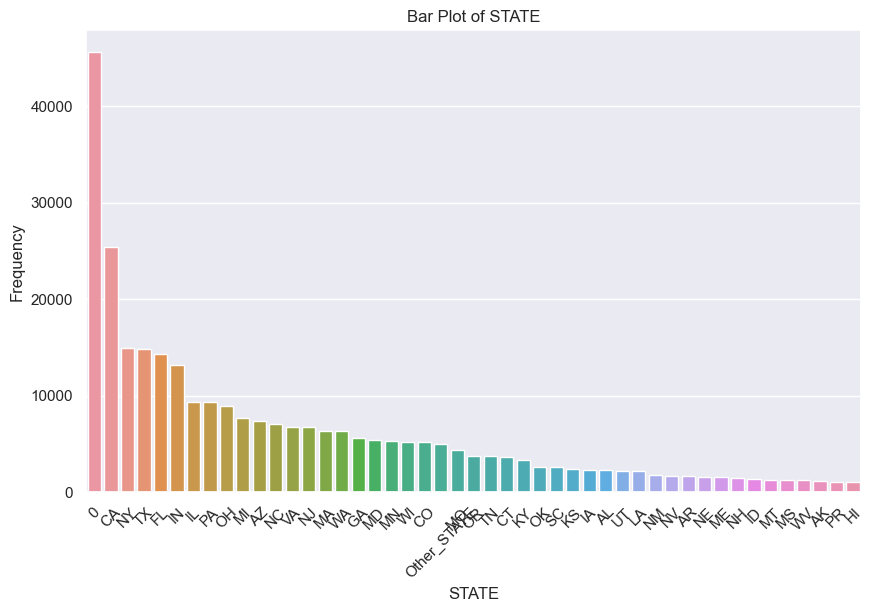

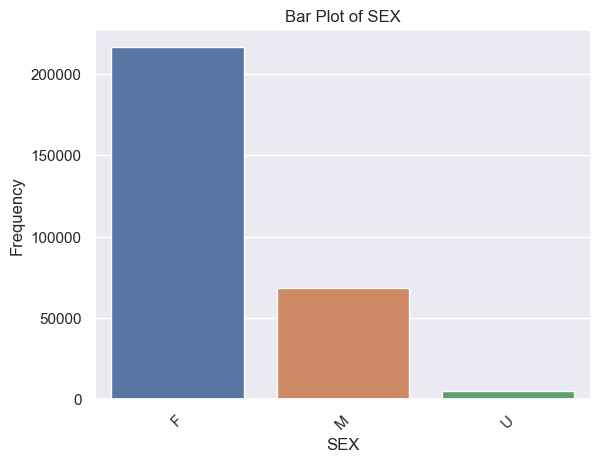

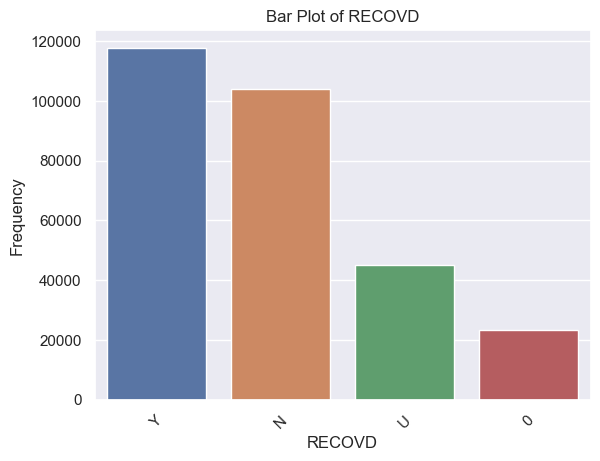

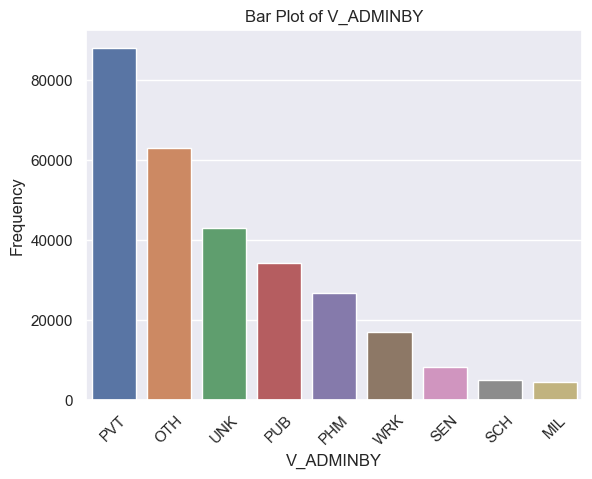

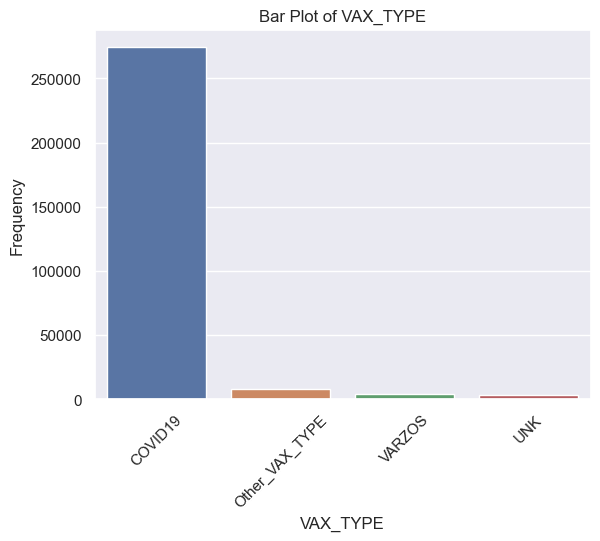

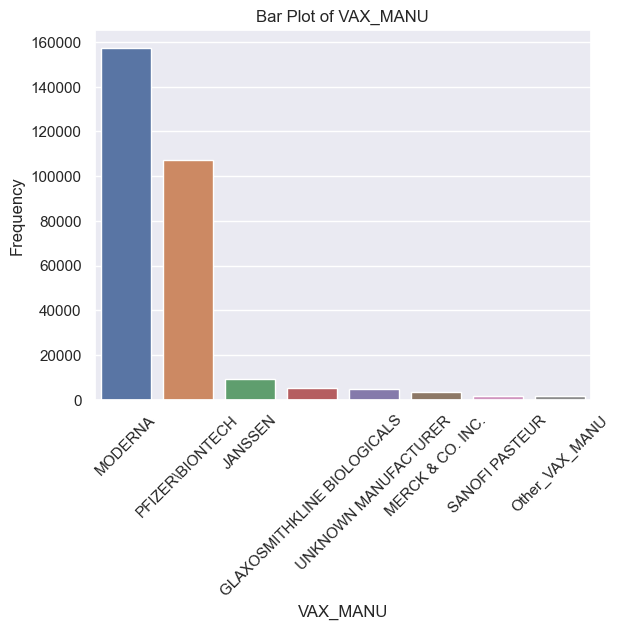

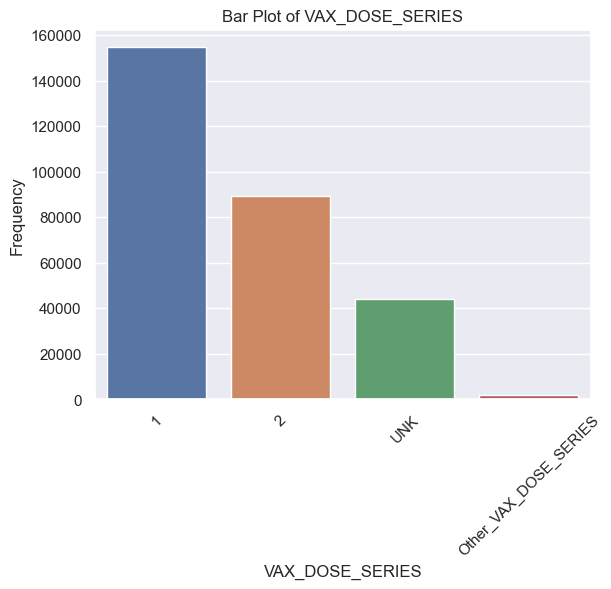

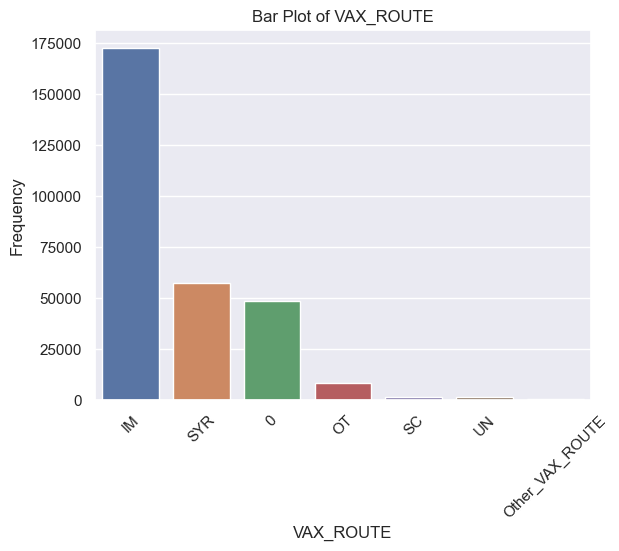

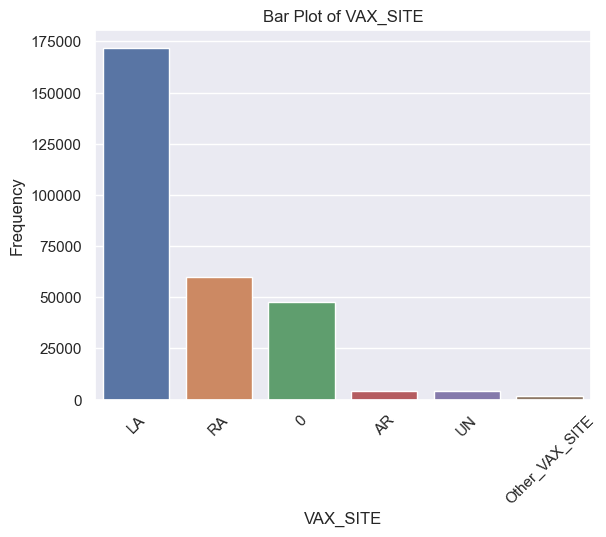

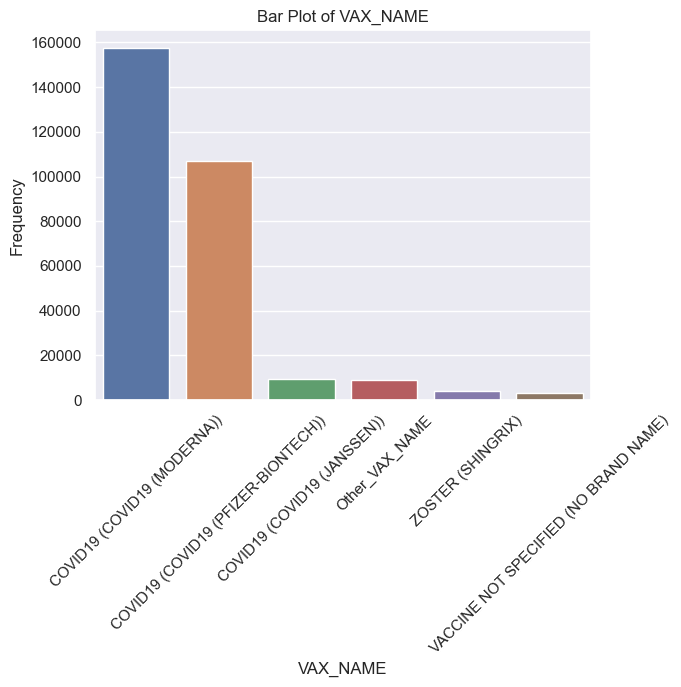

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
cat_cols=['STATE','SEX', 'RECOVD','V_ADMINBY','VAX_TYPE','VAX_MANU','VAX_DOSE_SERIES','VAX_ROUTE','VAX_SITE','VAX_NAME']
# Assuming cat_cols contains the names of categorical columns in your DataFrame

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate over each categorical column
for col in cat_cols:
    # Count the frequency of each category
    cat_counts = merged_data[col].value_counts()
    
    # Create a bar plot
    sns.barplot(x=cat_counts.index, y=cat_counts.values)
    
    # Set plot title and labels
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Rotate x-axis labels for better vdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlAAAAHfCAYAAACf7ObVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABZ4ElEQVR4nO3deVzN2f8H8Ne9pWTJklGMZQzjZomGipA9Q8pItiHMyDr2LMUwzNi3so+ILI0te7IbJowoxjKIQbahQptovff8/ujX/XaV0eeKe2tez8fDgz6fc899f9zb577u+Zx7rkwIIUBERERE+SbXdQFEREREhQ0DFBEREZFEDFBEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARUSFDtf/JSJdY4AiKoL69esHhUKh8cfGxgb9+/fHhQsXPtj9Pn78ONf9Wlpa4ssvv0S3bt2wc+dOddvz589DoVDg/Pnz+e4/PT0dc+bMQXBw8HvXmpycjGHDhqFhw4awtbXF/fv3Nfbv378fCoUChw4demsf69evh6WlJR4+fCj5/lUqFVq3bg2FQoG//vorzzZt27bV+L+sU6cObGxs8M0332Dv3r1vbT9+/Pi33m/Pnj2hUCiwfPly9bZ+/fqhX79+6p+XL18OhUKBDRs25NmHt7c32rZtm6t9zj/W1tb4+uuvsW3bNnW7sLAwWFpavrW+lJQUODo6wtHREa9fv37rMRDpA0NdF0BEH0bdunUxffp0AIBSqUR8fDy2bt0KDw8P7N69G1988cUHu+/hw4ejdevWALJGi169eoWgoCD88MMPyMzMRO/evbXqNzY2Fhs3bsTcuXPfu8a9e/fi5MmT+PHHH/HFF1+gSpUqGvs7dOiAn3/+GcHBwejUqVOefezZswd2dnaoVq2a5Ps/e/Ysnj9/js8//xzbtm3DrFmz8mzXqlUrfP/99wCAzMxMxMfH49ChQ/Dy8sLNmzcxefJkjfZyuRwnT55EWloajI2NNfY9fvwYV65cyXeNvr6+aNOmDapXr56v9tu3bweQFQ6Tk5MRGhqK6dOnw8DAAD169EDTpk3Ru3dvbN26FS4uLurnSLYlS5bg8ePHCAwMRIkSJfJdJ5EuMEARFVGlSpWCtbW1xrZmzZrB3t4eu3fvhpeX1we772rVquV535GRkdiwYYPWAaogJSQkAAD69OkDmUyWa3/x4sXh7OyMnTt3IjExEWXKlNHYf+PGDdy+fRsLFy7U6v53796NL7/8Eg4ODvjll1/g7e2NUqVK5WpXvnz5XP+Xjo6O+OSTT7BhwwZ06NABjRs3Vu9r1KgRIiIiEBoaCkdHR43bHTx4EHXq1MHNmzfzVaORkRGmTJmCwMDAPP+P3vRmnS1btkRkZCS2bduGHj16AAAmTpyI0NBQzJgxAwcOHFAf85UrV7Bp0yZ4eHhoHA+RvuIlPKL/EBMTExgbG2u8GCqVSqxZswbOzs5o0KABrK2t0bt3b4SFhanbLF++HI6OjlixYgXs7OzQokULJCYmSrpvuVyOOnXq4MmTJ29tc+3aNXh4eKBJkyZo1KgRhg0bhr///htA1uhJu3btAACTJ0/WuIT0prS0NKxcuRIdO3aElZUVOnTogDVr1kClUgHIumSVfQnL0tIS3t7eefbj5uaGjIwMHD58ONe+PXv2wNTUFF999VX+/gNySExMxPHjx9GmTRs4OzsjJSUF+/btk9THyJEjYWxsrHGJDACqVq2K+vXr51nzwYMH0blz53zfh7e3NyIiIrBp0yZJteVkamqq8XwrWbIkZs6ciadPn8LHxwcAkJGRgR9++AG1atXC6NGjtb4voo+JAYqoiBJCIDMzE5mZmcjIyMCzZ8+wePFipKenw83NTd1u0aJFWLVqFXr16gV/f3/MnDkTCQkJGDNmDFJSUtTtnjx5gt9//x2+vr6YPHlyrhGZ/IiKinrr5a6wsDB88803AIA5c+Zg1qxZePr0KXr37o27d++iYsWKWLFiBYCsS4TZ/87ruIcNGwZ/f3/06NEDq1evRseOHbFkyRL1Jc3p06eje/fuALIuO2VfInuTlZUVFApFrjlXmZmZCAkJgYuLS67LZPkRHBwMpVIJFxcXVK5cGU2bNlVf/sqv0qVLo0GDBrh48WKufU5OTurLeNnu3buHyMhISQHKzc0NLVu2hK+vb77meWU/3zIzM5GUlIQDBw4gNDQU7u7uGu2aN2+Onj17Ytu2bYiMjERAQADu37+PhQsXwsjIKN/1EekSL+ERFVHh4eGoV69eru2enp6oWbOm+ufY2FiMGzdOYxKxsbExRo0ahVu3bqkvy2RmZsLLyws2NjbvvG+VSoXMzEz1v2NiYrB582ZERkZixowZed5m8eLFqF69OtasWQMDAwMAQIsWLeDo6Ihly5Zh6dKlqFOnDoCsS4R169bNs5/Q0FD88ccf8PHxUYeF5s2bo3jx4li6dCn69++PL774AhYWFgByX3Z6k5ubG+bOnYsnT56gcuXK6vt48eKFOoRJtXv3brRs2RKffPIJAKBbt26YOHEiLl26hEaNGuW7nwoVKuDq1au5tnfq1AkLFy7UuIx38OBBfPnll+pjyK+ZM2fC2dkZU6ZMwebNm//1Ul5ez7e2bdvCyckp13YvLy+EhoZiypQpiIqKwqhRo2BpaSmpNiJd4ggUURFVr1497Ny5Ezt37kRQUBDWrVuHAQMGwNfXF76+vup2ixcvxoABAxAXF4eIiAjs2rUL+/fvB5D1qbecsgPMu/zwww+oV68e6tWrBysrK7Rv3x67d+/G8OHD0atXr1ztX79+jWvXrqFTp07q8ARkXf5p06aNpE8OXrhwAYaGhujYsaPG9i5duqj3S9GlSxcYGhriwIED6m179+5F3bp13xri/k1kZCSuX7+ODh06ICkpCUlJSWjatClKlCgheRRKCJFnoKlcuTKsra01LuMdPHgQzs7Okuu1sLCAl5cXwsPDsXnz5n9tm/1827lzJzZv3oxJkyYhIiICHh4eUCqVGm1LlSqFmTNn4vr166hduzYGDRokuTYiXeIIFFERVbJkSVhZWWlsa9GiBV6/fg1/f3/0798fZmZmuHbtGn766Sdcu3YNJiYmqFWrlnqU4s31lkqWLJmv+x45cqT6E1ZyuRylS5dGlSpVIJfn/Z7t5cuXEEKgQoUKufZVqFABL1++zNf9Alnzi8qVK6cRxACoR3uk9AUA5cqVQ9u2bREcHIwhQ4YgMTERJ0+efOu8qXfJXsph8uTJuT5Bd+jQIUyZMiXfl0djYmLUI2lv6tSpE5YuXYq0tDRERUXh/v37uUJlfvXo0QOHDx+Gj48P2rRp89Z2bz7f7Ozs8Mknn2DixIk4ceIEOnTooLG/ZcuWALKel28+XkT6jiNQRP8x9evXR2ZmJh4/fozk5GQMGjQIJUqUQEhICC5duoSdO3dqzJHSxqeffgorKytYWVmhXr16qFat2lvDE5A1n0cmk+H58+e59j179gxly5bN932XKVMG8fHxuUY8YmNjAWQFIqm6d++O27dv4/bt2zh48CBkMhlcXFwk95Oeno7g4GB06NABmzZt0vgzZ84cpKWlYc+ePfnqKzExEdevX4etrW2e+zt27IiUlBScPn0ahw4dQtOmTWFmZia55myzZs2CgYEBpkyZImkh0/r16wNArnW2iAo7Biii/5irV6/CwMAAVatWxb1795CQkID+/fujVq1a6pATGhoKAOpPrX1oJUqUQP369XHo0CGN4PPy5UucOnVK/bH2/IxS2NnZITMzM9en0LIvS2rzEfkWLVrAwsICR48exaFDh9ChQweYmppK7ue3335DQkICevfujSZNmmj8cXNzw2effZbvy3irV69GRkZGnpdEAcDc3ByNGzfG4cOHcejQIUmTx/NSqVIleHl54cKFCzhx4kS+b5c9R+uzzz57r/sn0je8hEdURCUnJ+Py5cvqn9PT0/Hbb79h165d6NWrF8qXL49ixYqhVKlSWL16NQwNDWFoaIgjR46oLzPl/BTehzZ+/Hh4eHhgyJAh6NOnDzIyMrBmzRqkp6djxIgRALJGqgDg3LlzqFmzJho2bJirn5YtW6JJkyaYOnUqYmJiYGlpiQsXLmDt2rVwdXVFrVq1JNcml8vRtWtX7N27F0+ePEFAQIBWx7hr1y6YmZmhadOmee7v0qULli1bhvPnz6NJkyYAgLi4OPXjqFQq8eLFCxw5cgQHDhzAsGHDcl02y6lTp06YO3cuZDJZrstn2ujZsycOHz6Ms2fP5hkgcz7flEolrl+/jmXLlqF27dq5Fs0kKuwYoIiKqBs3bmiMThgbG6NatWoYN24cPDw8AGQFklWrVmHBggUYM2YMSpYsiTp16iAwMBCDBw9GRETEv663VJDs7e0REBCAZcuWwdPTE0ZGRrCxscH8+fPVq6aXKlUK3333HbZv347ff/8dZ8+eRbFixTT6kclk8PPzw7Jly7BhwwbExcWhSpUq8PT0xHfffad1fd27d4efnx+qVq0KOzs7ybePiYnB2bNn0bt377eOpH399ddYvnw5tm3bpg5Qv//+O37//Xf1sZmamqJu3bpYtmzZO9eg6tixI2bPno3WrVurw+f7mjVr1lsno+d8vhUrVgwVK1aEk5MTxowZw+UJqMiRCX4rJxEREZEkHIEiInpPSqXynROrZTIZP2lGVIRwBIqI6D3169fvnetLffrpp/jtt98+UkVE9KExQBERvad79+7h1atX/9rGyMgICoXiI1VERB8aAxQRERGRRFwHioiIiEgiBigiIiIiiRigiIiIiCTiMgYfiBACKhWnlxERERUWcrkMMpksX20ZoD4QlUogLu7fP5VDRERE+qN8+ZIwMMhfgOIlPCIiIiKJGKCIiIiIJGKAIiIiIpKIAYqIiIhIIgYoIiIiIokYoIiIiIgkYoAiIiIikogBioiIiEgiBigiIiIiiRigiIiIiCRigCIiIiKSiAGKiIiISCIGKCIiIiKJGKCIiIiIJGKAIiIiIpLIUNcF/NfI5TLI5TJdl5FvKpWASiV0XQYREZFeYYD6iORyGcqWLQEDg8Iz8KdUqpCQ8JohioiIKAcGqI9ILpfBwECOlVvP4p/YRF2X806fViyDEd80h1wuY4AiIiLKgQFKB/6JTcT9f+J1XQYRERFpqfBcSyIiIiLSEwxQRERERBIxQBERERFJxABFREREJBEDFBEREZFEDFBEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARURERCQRAxQRERGRRAxQRERERBIxQBERERFJxABFREREJBEDFBEREZFEDFBEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARURERCSRzgNUZmYmli5dijZt2uDLL79E3759cfnyZfX+mzdvwt3dHdbW1mjbti02bdqkcXuVSoVly5bBwcEB1tbWGDx4MB49eqTRpiD6ICIiIsqm8wD1yy+/ICgoCDNnzsTevXtRo0YNDBo0CLGxsYiPj8d3332HatWqYdeuXRgxYgQWLVqEXbt2qW+/atUqbNmyBTNnzsS2bdugUqkwaNAgpKenA0CB9EFERESUk84D1PHjx+Hs7IwWLVqgevXq8Pb2xsuXL3H58mXs2LEDxYoVw88//4yaNWvCzc0N3377LdasWQMASE9Px/r16zF69Gi0bt0alpaW8PX1RXR0NI4ePQoABdIHERERUU46D1BmZmY4efIkHj9+DKVSie3bt8PIyAiWlpaIiIiAnZ0dDA0N1e2bNm2K+/fv4/nz54iMjMSrV69gb2+v3m9qaoq6desiPDwcAAqkDyIiIqKcDN/d5MP64YcfMGbMGLRr1w4GBgaQy+VYvnw5qlWrhujoaNSuXVujfcWKFQEAT58+RXR0NACgUqVKudpk7yuIPrRlaKiZTw0MdJ5XtVJY6yYiIvpQdB6g7ty5g9KlS2PlypUwNzdHUFAQJkyYgMDAQKSmpsLIyEijvbGxMQAgLS0NKSkpAJBnm8TERAAokD60IZfLUK5cSa1vr09MTU10XQIREZFe0WmAevr0KcaPH48NGzbAxsYGAGBlZYU7d+5g+fLlKF68eK6J3GlpaQCAEiVKoHjx4gCy5jFl/zu7jYlJ1ot+QfShDZVKICnptcY2AwN5oQwjSUkpUCpVui6DiIjogzI1Ncn3VRedBqgrV64gIyMDVlZWGtsbNmyI0NBQVK5cGbGxsRr7sn82NzdHZmamelu1atU02igUCgCAhYXFe/ehrczMohE6lEpVkTkWIiKigqDTyS0WFhYAgFu3bmlsv337Nj777DPY2tri4sWLUCqV6n1hYWGoUaMGzMzMYGlpiVKlSuH8+fPq/UlJSbhx4wZsbW0BoED6ICIiIspJpwGqQYMGaNy4Mby8vBAWFob79+9jyZIlOHfuHIYMGQI3NzckJyfjhx9+wJ07d7B7925s2LABQ4cOBZA1b8nd3R2LFi3CiRMnEBkZiXHjxsHCwgIdOnQAgALpg4iIiCgnnV7Ck8vl+OWXX7BkyRJMnjwZiYmJqF27NjZs2ICGDRsCAPz9/TF79my4urrik08+waRJk+Dq6qruY/To0cjMzMTUqVORmpoKW1tbrFu3DsWKFQOQtUzC+/ZBRERElJNMCCF0XURRpFSqEBf3SmOboaEc5cqVxJSlB3H/n3gdVZZ/n31aDnPGOCE+/hXnQBERUZFXvnzJfE8i5wI/RERERBIxQBERERFJxABFREREJBEDFBEREZFEDFBEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARURERCQRAxQRERGRRAxQRERERBIxQBERERFJxABFREREJBEDFBEREZFEDFBEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARURERCQRAxQRERGRRAxQRERERBIxQBERERFJxABFREREJBEDFBEREZFEDFBEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARURERCQRAxQRERGRRAxQRERERBIxQBERERFJxABFREREJBEDFBEREZFEDFBEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARURERCQRAxQRERGRRAxQRERERBIxQBERERFJxABFREREJBEDFBEREZFEDFBEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARURERCQRAxQRERGRRIa6LoCKDrlcBrlcpusy8k2lElCphK7LICKiQogBigqEXC5DuXImkMsNdF1KvqlUSsTHpzBEERGRZAxQVCCyRp8MEHVgLVJePNV1Oe9kYlYJNZwHQy6XMUAREZFkDFBUoFJePEVKzENdl0FERPRBcRI5ERERkUQMUEREREQSMUARERERScQARURERCSRXgSovXv3wsnJCVZWVujcuTMOHTqk3vf48WMMHToUjRo1QosWLbBkyRIolUqN2//6669o164dGjRogD59+uDGjRsa+wuiDyIiIqJsOg9Q+/btww8//IC+ffsiJCQEzs7O8PT0xJ9//omMjAx4eHgAALZt24YZM2Zg69atWLlypfr2e/bswYIFCzBmzBjs3r0bVapUwXfffYe4uDgAKJA+iIiIiHLSaYASQmDp0qXo378/+vbti2rVqmH48OFo1qwZLly4gCNHjuDJkydYsGABateujfbt28PT0xMbN25Eeno6AGD16tVwd3dHly5dUKtWLcyZMwcmJiYICgoCgALpg4iIiCgnnQaoqKgo/PPPP3BxcdHYvm7dOgwdOhQRERGoV68eypQpo97XtGlTJCcn4+bNm3jx4gXu378Pe3t79X5DQ0PY2NggPDwcAAqkDyIiIqKcdLqQZlRUFADg9evX8PDwwI0bN1ClShUMHz4cbdu2RXR0NCwsLDRuU7FiRQDA06dPYWiYVX6lSpVytYmMjASAAulDW4aGmvnUwEDnV0y1kp+6i/KxERERvUmnASo5ORkA4OXlhZEjR2LChAk4cuQIvv/+ewQEBCA1NRWmpqYatzE2NgYApKWlISUlBQBgZGSUq01aWhoAFEgf2sj6briSWt9en5iamui6hA+mKB8bERF9ODoNUMWKFQMAeHh4wNXVFQBQp04d3LhxAwEBAShevLh6nlK27FBTokQJFC9eHADybGNikvXCWBB9aEOlEkhKeq2xzcBAXihfsJOSUqBUqv61TVE+NiIi+m8wNTXJ95UJnQYoc3NzAEDt2rU1tteqVQunTp2CnZ0dbt++rbEvNjZWfdvsy26xsbGoWbOmRpvsvi0sLN67D21lZhaNF2alUlVkjuVNRfnYiIjow9HpBJB69eqhZMmSuHLlisb227dvo1q1arC1tcWNGzfUl/oAICwsDCVLloSlpSXMzMxQo0YNnD9/Xr0/MzMTERERsLW1BYAC6YOIiIgoJ50GqOLFi2PQoEFYuXIlDhw4gIcPH+KXX37B2bNn8d1336F9+/b45JNPMHbsWERGRuL48ePw8fHBwIED1XOWBg4ciICAAOzZswd37tzBlClTkJqaiu7duwNAgfRBRERElJNOL+EBwPfffw8TExP4+voiJiYGNWvWxPLly9GkSRMAgL+/P3766Sf07NkTZcqUQZ8+ffD999+rb9+zZ0+8fPkSS5YsQUJCAurXr4+AgACUL18eQNZk8Pftg4iIiCgnmRBC6LqIokipVCEu7pXGNkNDOcqVK4kpSw/i/j/xOqos/z77tBzmjHFCfPyrd84Tyj62Gxt/RkrMw49UofZMzKuh7oAf83VsRET031C+fMl8TyLnIjhEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARURERCQRAxQRERGRRAxQRERERBIxQBERERFJxABFREREJBEDFBEREZFEWgWoAwcOID09vaBrISIiIioUtApQkyZNQvPmzTFjxgxcvXq1oGsiIiIi0mtaBajffvsNAwcORFhYGHr16gUnJyesW7cOz549K+j6iIiIiPSOVgHKwsICw4cPx+HDh/Hrr7/CxsYGa9euRZs2bTBs2DAcPXoUmZmZBV0rERERkV4wfN8OGjVqhEaNGqFHjx5YsGABTp06hVOnTqFChQoYMGAABg4cCAMDg4KolYiIiEgvvFeA+ueff7Bv3z7s27cPDx8+RLVq1eDp6YnWrVvj1KlTWLlyJe7cuYP58+cXVL1EREREOqdVgAoKCsK+fftw6dIlGBsbo2PHjpg9ezZsbGzUbWrXro34+Hhs27aNAYqIiIiKFK0C1LRp09CwYUPMmDEDTk5OKFWqVJ7tFAoFevXq9V4FEhEREekbrQLUgQMHUKtWLSiVSvX8ptTUVGRkZKB06dLqdl27di2QIomIiIj0iVafwvvss88wffp09OzZU73t0qVLsLe3x/z586FSqQqsQCIiIiJ9o1WAWrZsGfbv3w9nZ2f1trp162LChAnYsWMH/P39C6xAIiIiIn2j1SW84OBgeHl5oXfv3uptZcuWxbfffgtDQ0Ns2rQJQ4YMKbAiiYiIiPSJViNQ8fHxqFq1ap77Pv/8c0RHR79XUURERET6TKsA9fnnn+PIkSN57vvtt99QvXr19yqKiIiISJ9pdQmvf//+8Pb2RkJCAtq3bw8zMzPExcXh5MmTOHToEObOnVvQdRIRERHpDa0CVNeuXfHq1SusWrUKR48eVW8vV64cpk2bxuULiIiIqEjT+qtc+vbtiz59+iAqKgoJCQkwNTXF559/Drlcq6uCRERERIXGe30Xnkwmw+eff15QtRAREREVCloFqLi4OMyePRunTp1CSkoKhBAa+2UyGW7cuFEgBRIRERHpG60C1M8//4yTJ0+ic+fOsLCw4GU7IiIi+k/RKkCFhoZiypQp/KJgIiIi+k/SauioWLFib11Ik4iIiKio0ypAOTo64sCBAwVdCxEREVGhoNUlvLp162LJkiV49OgRGjZsiOLFi2vsl8lkGDFiRIEUSERERKRvtJ5EDgDh4eEIDw/PtZ8BioiIiIoyrQJUZGRkQddBREREVGi89/oDL1++xN27d5Geng6lUlkQNRERERHpNa0D1Pnz59GjRw/Y2dnBxcUFf//9N8aPH4958+YVZH1EREREekerAHXu3Dl4eHigePHimDBhgnolcktLS2zatAkBAQEFWiQRERGRPtEqQC1ZsgTt2rXD5s2bMWDAAHWAGjZsGAYNGoSgoKACLZKIiIhIn2gVoG7evAk3NzcAWZ+4y6l58+b4559/3r8yIiIiIj2lVYAqXbo0nj17lue+p0+fonTp0u9VFBEREZE+0ypAtWvXDr6+vrh27Zp6m0wmQ3R0NFavXo3WrVsXVH1EREREekerdaDGjx+PK1euoGfPnqhQoQIAwNPTE9HR0ahUqRI8PT0LtEgiIiIifaJVgCpTpgyCgoKwd+9ehIWFISEhAaVLl0a/fv3QrVs3mJiYFHSdRERERHpDqwAFAEZGRujZsyd69uxZkPUQERER6T2tAtTevXvf2aZr167adE1ERESk97QKUN7e3nlul8lkMDAwgIGBAQMUERERFVlaBagTJ07k2vb69WtERERg7dq1WLly5XsXRkRERKSvtApQn376aZ7bv/jiC2RkZGDmzJnYsmXLexVGREREpK+0/jLht1EoFLh+/XpBd0tERESkNwo0QKWnp2Pnzp0wMzMryG6JiIiI9IpWl/Datm2b6zvwVCoV4uPjkZaWBi8vrwIpjoiIiEgfaRWg7OzscgUoAChVqhTatGmDZs2avXdhRERERPpKqwA1b968gq6DiIiIqNDQKkA9efJEUvvKlStrczdEREREeqnA5kD9m5s3b2pzN0RERER6SasAtWTJEkyfPh316tVDly5dYG5ujvj4ePz22284dOgQhg8f/ta1ooiIiIgKO60C1L59+9CmTZtcc6GcnJxgZmaGS5cuYeTIkQVSIJE+kMtlkMvzP+qqayqVgEoldF0GEVGRpVWAOnfuHFasWJHnvpYtW2Lbtm3vVRSRPpHLZShbzgQGcgNdl5JvSpUSCfEpDFFERB+IVgGqXLlyuHLlClq0aJFr37lz52Bubv7ehRHpC7lcBgO5Afx+34QniTG6LuedKpcxx9BW/SGXyxigiIg+EK0CVPfu3fHLL78gJSUFbdu2Rfny5fH8+XMcPnwYW7duxbRp0wq6TiKde5IYgwcvHuu6DCIi0gNaBajvv/8eL1++xIYNG7Bu3ToAgBACJiYmGDduHHr37l2gRRIRERHpE60ClEwmg7e3N77//ntcvnwZiYmJKFeuHKytrVGqVKmCrpGIiIhIr2gVoLKVKlUKFStWBABYW1sjMzOzQIoiIiIi0mdaB6h9+/Zh8eLFePbsGWQyGYKCgrB8+XIUK1YMixcvhpGRUUHWSURERKQ35Nrc6ODBg/Dy8kLTpk3h4+MDlUoFAHB0dMTvv/+OVatWaVVMVFQUvvzyS+zevVu97ebNm3B3d4e1tTXatm2LTZs2adxGpVJh2bJlcHBwgLW1NQYPHoxHjx5ptCmIPoiIiIiyaRWgVq9ejd69e2PBggXo0KGDerubmxtGjRqFkJAQyX1mZGRgwoQJeP36tXpbfHw8vvvuO1SrVg27du3CiBEjsGjRIuzatUvdZtWqVdiyZQtmzpyJbdu2QaVSYdCgQUhPTy+wPoiIiIhy0ipARUVFwdHRMc99DRs2REyM9LVyli9fnmsC+o4dO1CsWDH8/PPPqFmzJtzc3PDtt99izZo1AID09HSsX78eo0ePRuvWrWFpaQlfX19ER0fj6NGjBdYHERERUU5aBSgzMzPcvXs3z313796FmZmZpP7Cw8Oxffv2XF8NExERATs7Oxga/m+qVtOmTXH//n08f/4ckZGRePXqFezt7dX7TU1NUbduXYSHhxdYH0REREQ5aTWJ3MnJCcuWLUPFihXRqlUrAFlLG/z1119YtWoVnJ2d891XUlISJk2ahKlTp6JSpUoa+6Kjo1G7dm2Nbdmf+nv69Cmio6MBINftKlasqN5XEH1oy9BQM58aGGiVV3UuP3Xz2PRPYa2biKgw0CpAjR07Frdv38bYsWMhl2edpPv164fXr1/DxsYGY8aMyXdfM2bMwJdffgkXF5dc+1JTU3N9ms/Y2BgAkJaWhpSUFADIs01iYmKB9aENuVyGcuVKan17fWJqaqLrEj4YHhsREWlDqwBlZGQEf39/nD17FmFhYUhISEDp0qVhZ2eHVq1aQSbL37fW7927FxEREQgODs5zf/HixXNN5E5LSwMAlChRAsWLFweQNY8p+9/ZbUxMTAqsD22oVAJJSa81thkYyAvli1pSUgqUStW/tuGx6Z/8HBsREf2PqalJvkfvtQpQHh4eGDRoEJo3b47mzZtr0wUAYNeuXXjx4gVat26tsX369Ok4ePAgLCwsEBsbq7Ev+2dzc3P1wp2xsbGoVq2aRhuFQgEABdKHtjIzi8aLl1KpKjLH8iYeGxERaUOrAHXp0qV8jzL9m0WLFiE1NVVjW4cOHTB69Gh06dIF+/btw7Zt26BUKmFgYAAACAsLQ40aNWBmZobSpUujVKlSOH/+vDr8JCUl4caNG3B3dwcA2NravncfRERERDlpNcvUwcEB+/fvR0ZGxnvdubm5OapXr67xB8j6lJ+5uTnc3NyQnJyMH374AXfu3MHu3buxYcMGDB06FEDWpUR3d3csWrQIJ06cQGRkJMaNGwcLCwv1+lQF0QcRERFRTlqNQBkbG2P//v04dOgQatasiRIlSmjsl8lk2Lhx43sXZ2ZmBn9/f8yePRuurq745JNPMGnSJLi6uqrbjB49GpmZmZg6dSpSU1Nha2uLdevWoVixYgXWBxEREVFOWgWo6OhofPnll+qfhRAa+9/8WYpbt25p/NygQQNs3779re0NDAwwceJETJw48a1tCqIPIiIiomz5DlBHjx5F06ZNYWpqis2bN3/ImoiIiIj0Wr7nQI0ZMwb379/X2LZ27Vq8ePGioGsiIiIi0mv5DlBvXpZTKpXw8fF579W6iYiIiAqb9/quh/eZ60RERERUWPHLsoiIiIgkYoAiIiIikui9A1RBrEhOREREVJhIWgdqxIgRMDIy0tg2bNiwXAtOymQyHD9+/P2rIyIiItJD+Q5QOVfuJiIiIvovy3eAmjt37oesg4iIiKjQ4CRyIiIiIokYoIiIiIgkYoAiIiIikogBioiIiEgiBigiIiIiiSStA0VERY9cLoNcXngWxFWpBFQqfg8nEekWAxTRf5hcLkO5siaQGxjoupR8UymViE9IYYgiIp1igCL6D5PLZZAbGODyL35IfvJU1+W8U6nKlWA9fCjkchkDFBHpFAMUESH5yVMkPXig6zKIiAoNTiInIiIikogBioiIiEgiBigiIiIiiRigiIiIiCRigCIiIiKSiAGKiIiISCIGKCIiIiKJGKCIiIiIJGKAIiIiIpKIAYqIiIhIIgYoIiIiIokYoIiIiIgkYoAiIiIikogBioiIiEgiBigiIiIiiRigiIiIiCRigCIiIiKSiAGKiIiISCIGKCIiIiKJGKCIiIiIJGKAIiIiIpKIAYqIiIhIIgYoIiIiIokYoIiIiIgkYoAiIiIikogBioiIiEgiQ10XQET0ocjlMsjlMl2XkW8qlYBKJXRdBhHlAwMUERVJcrkMZcuWgIFB4RloVypVSEh4zRBFVAgwQBFRkSSXy2BgIMe+Hefx/NlLXZfzThU+KY2vezaBXC5jgCIqBBigiKhIe/7sJWKeJOi6DCIqYgrP2DYRERGRnmCAIiIiIpKIAYqIiIhIIgYoIiIiIokYoIiIiIgkYoAiIiIikogBioiIiEgiBigiIiIiiRigiIiIiCRigCIiIiKSiAGKiIiISCIGKCIiIiKJGKCIiIiIJGKAIiIiIpKIAYqIiIhIIgYoIiIiIokYoIiIiIgkYoAiIiIikogBioiIiEginQeohIQE/Pjjj2jZsiUaNWqEb775BhEREer9586dQ7du3dCwYUN07NgRISEhGrdPS0vDTz/9BHt7e3z55ZcYP3484uLiNNoURB9ERERE2XQeoDw9PfHnn3/Cx8cHu3btQp06deDh4YF79+7h7t27GDp0KBwcHLB792706NEDkyZNwrlz59S3nzFjBs6cOYPly5dj48aNuHfvHkaPHq3eXxB9EBEREeVkqMs7f/DgAc6ePYstW7agcePGAIBp06bh9OnTCA4OxosXL6BQKDBu3DgAQM2aNXHjxg34+/vD3t4eMTEx2Lt3L1avXg0bGxsAgI+PDzp27Ig///wTX375JTZu3PjefRARERHlpNMRqHLlymHNmjWwsrJSb5PJZJDJZEhKSkJERATs7e01btO0aVNcvHgRQghcvHhRvS1bjRo1YG5ujvDwcAAokD6IiIiIctLpCJSpqSlatWqlse3IkSN48OABpkyZgj179sDCwkJjf8WKFZGSkoL4+HjExMSgXLlyMDY2ztUmOjoaABAdHf3efWjL0FAznxoY6PyKqVbyUzePTf/w2IrusRGR7uk0QL3p0qVLmDx5Mjp06IDWrVsjNTUVRkZGGm2yf05PT0dKSkqu/QBgbGyMtLQ0ACiQPrQhl8tQrlxJrW+vT0xNTXRdwgfDYyuceGxEpGt6E6COHz+OCRMmoFGjRli0aBGArBCTnp6u0S77ZxMTExQvXjzXfiDrU3UmJiYF1oc2VCqBpKTXGtsMDOSF8uSYlJQCpVL1r214bPqHx1Z0j42IPgxTU5N8jwLrRYAKDAzE7Nmz0bFjR8yfP189IlSpUiXExsZqtI2NjUWJEiVQunRpWFhYICEhAenp6RqjSLGxsTA3Ny+wPrSVmVk0ToJKparIHMubeGyFE4+NiHRN5xfbt2zZgpkzZ6Jv377w8fHRCDE2Nja4cOGCRvuwsDA0atQIcrkcjRs3hkqlUk8EB4CoqCjExMTA1ta2wPogIiIiykmnASoqKgpz5syBo6Mjhg4diufPn+PZs2d49uwZXr58iX79+uHq1atYtGgR7t69i/Xr1+Pw4cMYNGgQAMDc3BydO3fG1KlTcf78eVy9ehWenp6ws7ODtbU1ABRIH0REREQ56fQS3pEjR5CRkYFjx47h2LFjGvtcXV0xb948rFq1CgsXLsTGjRtRpUoVLFy4UGNZgpkzZ2LOnDkYOXIkAKBly5aYOnWqev8XX3zx3n0QERER5aTTADVs2DAMGzbsX9u0bNkSLVu2fOv+EiVKYNasWZg1a9YH7YOIiIgom87nQBEREREVNgxQRERERBIxQBERERFJxABFREREJJFeLKRJRETSyOUyyOUyXZchiUoloFIJXZdBVCAYoIiIChm5XIZyZU0gNzDQdSmSqJRKxCekMERRkcAARURUyMjlMsgNDHBw+zrExT7VdTn5Ur5iJTj18oBcLmOAoiKBAYqIqJCKi32K2CePdF0G0X8SJ5ETERERScQARURERCQRAxQRERGRRAxQRERERBIxQBERERFJxABFREREJBEDFBEREZFEDFBEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARURERCQRAxQRERGRRAxQRERERBIxQBERERFJxABFREREJBEDFBEREZFEDFBEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARURERCQRAxQRERGRRAxQRERERBIxQBERERFJxABFREREJBEDFBEREZFEhrougIiI6E1yuQxyuUzXZeSbSiWgUgldl0EfEQMUERHpFblchnLlSkAuLzwXSVQqFeLjXzNE/YcwQBERkV7JGn2S48GxG0iLf63rct7JuFwJVHesC7lcxgD1H8IARUREeikt/jVSnifrugyiPBWe8VEiIiIiPcEARURERCQRAxQRERGRRAxQRERERBIxQBERERFJxABFREREJBEDFBEREZFEDFBEREREEjFAEREREUnElciJiIg+In5RctHAAEVERPSR8IuSiw4GKCIioo8k+4uSQ0JCEBcXp+ty3ql8+fLo3Llzvr8o+b80usYARURE9JHFxcUhNjZW12UUqP/a6BoDFBEREb237NG1yD934fXL57ou551KlK4Ayy/d8j269iYGKCIiIiowr18+R3LSU12X8cEVnnE2IiIiIj3BAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARURERCQRAxQRERGRRAxQRERERBIxQBERERFJxABFREREJBED1P9TqVRYtmwZHBwcYG1tjcGDB+PRo0e6LouIiIj0EAPU/1u1ahW2bNmCmTNnYtu2bVCpVBg0aBDS09N1XRoRERHpGQYoAOnp6Vi/fj1Gjx6N1q1bw9LSEr6+voiOjsbRo0d1XR4RERHpGQYoAJGRkXj16hXs7e3V20xNTVG3bl2Eh4frsDIiIiLSRzIhhNB1Ebp29OhRjBo1CleuXEHx4sXV28eMGYPU1FT4+flJ7lMIAZVK879WJgPkcjkSk1OhVKreu+4PzcBAjjKlikOlUuFdz5LsY8t4lQShUn6cAt+DTG6AYiVNJR1bUspLZBaCYzOUG8DUpLSkY0tLSoLI1P9jkxkawNhU2uP2qhD9vpWU+Pv2OjkJSqX+P24AYGBggBKlpD12Ga/TIVT6/xIlk8tQrISRtMfu9etC8dgZGBigRIkSko4tPe1VoXkdMDIuqXFscrkMMpksX7c3/IC1FRopKSkAACMjI43txsbGSExM1KpPmUwGA4O8H4QypYrnuV1fyeX5H6gsVtL0A1ZS8KQcm6lJ6Q9YScGTcmzGpkX3cStZhH/fSpQqXI8bIPF8UsLo3Y30iKTHrkSJD1hJwZNybEbGJT9gJQVPyrFp3K6A6yiUsked3pwwnpaWBhMTE12URERERHqMAQpApUqVAACxsbEa22NjY2Fubq6LkoiIiEiPMUABsLS0RKlSpXD+/Hn1tqSkJNy4cQO2trY6rIyIiIj0EedAIWvuk7u7OxYtWoTy5cvj008/xcKFC2FhYYEOHTroujwiIiLSMwxQ/2/06NHIzMzE1KlTkZqaCltbW6xbtw7FihXTdWlERESkZ7iMAREREZFEnANFREREJBEDFBEREZFEDFBEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUBRoaVUKnVdAtF/xrlz51CUlw0sysfGc+WHwQBVBAUGBiIyMlLXZXww+/fvR1JSEgwMDKBSqXRdToF78OBBkTuZ5zyeonZs2V68eKHrEj6YDRs2YNKkSZDJZLoupUD5+fnhxx9/BADIZLIi99ws6udKXWOAKmLmzJmDWbNmoWTJkrou5YP4+++/4ePjg2HDhiE5ORlyubxInRiWLl2KWbNmFbkXqhcvXuDly5dITk6GTCYrcu+I/fz84OnpiRs3bui6lA/i2bNnKF++PAAgMzNTx9UUjPT0dADAjh07MH/+fABFK0QV9XOlPmCAKkIWLFiA/fv3Y9++fahataquy/kgatSogbFjxyI1NRXDhw8vMicGIQRUKhUiIiLUj11hP6Zsq1evxqhRo9CjRw8MGTIEN2/ehIGBQZF5oXr06BECAwMRHh6OdevW4erVq7ouqcClpqaqvxfU0LBofIWqkZERvvnmG0yZMgUbN27EvHnzABSdEFVUz5X6hAGqiFixYgXWr1+P8ePHQ6FQACh6l0qEEDA0NISzszP69++PxMTEInNiEEKojyF79EkuL/y/nnPnzsWGDRvg7u6Onj17onTp0hgxYgRiYmKKzChbpUqV0LJlS6hUKrx48QIBAQFFJkRlj9IAKDKPV/abFQAwNTVF165dMWnSJGzatKnIhKiifK7UJ4X/DE2YPXs2Vq9ejerVqyM0NBRhYWEACv9JIKfsYJF9YnBxccH48eNx9+5djB07tsicGDIyMpCRkaHrMgrE7NmzsWfPHvj7+6Nz584YOHAghgwZAiMjI8TFxem6vAKhUqlgaGiIkSNHom7duihevDgeP34Mf39//PXXX7ouT2uHDh0CkDVKAwAlS5aEgYFBrnY5L+cVlnONTCbTeHNiamqKLl26YNKkSdi4cSPmzp2rbldYjimnonau3LdvH+7fv6/rMvLEAFXI/fjjj9i7dy+OHTuGGTNm4J9//sH69etx4cIFAIX3JJDt6NGjiI2NVf/CZx+LgYEBbt68idTUVNy7d6/Qvru6ceMGXr9+rT6hGxsbo1SpUgD+9+JUGOcLrVq1Cps3b8b27dtRv359pKamAgAaN26MzMxM/Prrr/Dw8EBAQADu3r2r42q1o1Kp1M83MzMzODg4oFGjRnB3d8e9e/ewZs2aQhmi7t69i3HjxmHw4MHqba9fv0ZCQgKuXLmCK1eu4OXLlwA0L+fp+wjVqlWr0K1bN4wdOxZBQUE4efKkOsiXL18e/fr1g5eXF7Zv314oQ1RRPFfGxcVh2rRpmDx5Mh49eqTrcnJhgCrEIiIikJiYiHXr1qFSpUqwt7fHiBEj8Pz5c/j7+xf6EBUZGYnZs2fj559/xosXLyCXy9UnaT8/PwQEBMDX1xcTJkwolEPUhw8fxnfffYc9e/aoX5AAICEhAQ8fPlQfQ17v/PX18VSpVHj27BmOHDkChUKBhw8fAgCKFy8OIGs+VHR0NJKSklCsWDHMnz8fGzZs0Djh67u//voLL1++VIdeuVwOIyMjNG7cGBs3bkTjxo0xceJEREVFFcoQValSJSxatAjXrl3D0KFDAWSNQN2/fx+DBg1Cnz590LlzZ7i4uGDYsGHw8/PD2rVr9fIFLtvLly9x48YN3LlzB4cPH8bq1asxbtw4dOzYEV999RW8vLywZ88efPLJJxgwYAA2btyI1atXA9D/YAgAV69exbx584rUuTI9PR3ly5fHzp07ERMTgylTpuT7OfaxziUyUVjOWqRhz549WLJkCXbs2AFzc3NkZmaq3w3+9ttvWLFiBSpUqAAPDw80adIEQNaTqjCcDICscNGxY0ds3LgRwcHBqFy5MqZPnw4zMzP4+flh/fr1WLRoERwcHJCZmYmQkBBs3LgRQghs3rxZPYqjz4QQGD58OB49eoS+ffuid+/e+P7773H+/Hmkp6fDzMwMlStXxueff46GDRvCwsICJUuWRP369dWBRN+kpqaiePHiuHz5Mnx9fZGRkYF+/fqhU6dO8Pf3h5+fHxYuXIhmzZrByMgI69atw8KFC3HkyBFUr15d1+W/0y+//IKVK1eiQYMG8PT0xOeff67+dBoAzJo1C0lJSViwYAH27duH9evX4/PPP8e3336Lhg0b6rDy/ElPT4eRkRHS09Nx/Phx/Pjjj2jRogUUCgVu3bqFgQMHIjo6GtevX0dUVBQeP36Me/fuAQCCg4P18sMrd+/eRc2aNfHgwQP4+fnhxo0bsLGxQb9+/XDx4kVcvHgRDx8+xF9//QWZTIa0tDT1qK+npyeGDBmi4yPIn/Xr1+PgwYNF4lzp5+cHAwMD9OzZE6ampvj777/h4eGB6tWrY86cOernWc7XtBcvXuDcuXNo2bIlTE1NP0qdRePjFP8xQgikpaXBwMAAz549g7m5OeRyufrJ1LZtWwBZE8vXrVsHAGjSpIl6JErfQ9ScOXOwdetWNG3aFAMGDACQdR18wYIFsLCwwI4dO7Bw4UI4ODio56B07twZ6enp2LNnDxITE/XypJBt9+7dKFGiBDp27IhffvkFI0aMQEBAAIoVK4a4uDg0atQIvXr1wrVr1xAZGYk///wTu3fvBgCULl0awcHBsLCw0PFR5LZz504EBARg06ZNsLa2hqenJxYtWoTt27fj2LFjOHv2LJYtWwZ7e3v1O8Rq1arh008/1fvnpEqlQlxcHA4dOgSVSoVbt25h7NixaNasGZo2bYpu3boBAL766issW7YMjx8/xtdffw2lUonly5dj69atqFOnjnpOkb7Zvn07Ll26hIcPH6Jfv35o3bo1HB0dAQDz5s3D4cOH0bJlSzRo0AANGjRAhw4dAGQFrpiYGBgbG6NixYq6PIQ8TZs2DREREQgKCkL16tUxePBg+Pn5ISwsDAqFAj169EC3bt3Uj29SUhLOnj2LuLg4/PHHH2jVqpWuDyHfBg4cCLlcXiTOldHR0di6dStMTEzg4uKCL774AuvWrYOHhwemTJmiDlHZ543Y2FjMmTMHf/31F2xtbT9agIKgQik9PV04OjqKiRMnamxXqVTqf584cUK4urqKYcOGiTNnznzsErUyZ84cYWNjIyIjIzW2b9iwQTg7OwtLS0tx4MABIYQQmZmZQgghlEql+ueXL19+3IIlevz4sejVq5fo2rWrOHHihHr70KFDhaOjo7CxsRF+fn4at8nIyBAPHz4UV69eFQ8fPvzYJefb7t27hbOzs+jTp4948eKFEEKIy5cvC3d3d9GgQQPh4+Ojbpv9mM2bN0/07NlTJCQk6KTm/EpJSRFCCHH16lXRv39/MXz4cOHp6SnmzZsn7OzsxNChQ8WRI0eEEEJ4enqKESNGqG8bHBys14/bvHnzhL29vfDw8BBdu3YVdevWFYGBgUIIIZKTk8WBAwdEp06dhLOzs/o2aWlpuio332bPni3s7OzEX3/9JYT437kxKipKeHl5ic6dO4t169ap2+c8dwqRdY7VZ+Hh4WLnzp3Cz89P/XgJUbjPlZs2bRIbN24UQgixaNEiYWlpKTZv3iwSExOFEELcvn1bODg4iL59+6p/p549eyY8PT1Fw4YN1Y/1x8IAVQhl/zLs2bNHtGvXTly8eFFjf84TwcmTJ0X79u3FmDFj1C8C+mr16tVCoVCIK1euqLdlH6sQWb9cXbp0EWPGjBGxsbEa+988+emzs2fPiiFDhgg3Nzdx/Phx9XZPT0+hUCiEt7e3xgtUYTk2pVIpQkJCRNeuXUWvXr3UIeratWvC3d1d9O3bV4SEhKjb+/r6ioYNG4qbN2/qquR8CQoKEk5OTuL58+dCCCEuXbok3N3dxaBBg8TevXvFo0ePxMiRI4WLi4twd3cXO3bsEK6urrl+L/XR7NmzhY2Njbh69ar6OTd58mTRvHlzkZSUJIQQ4vXr1yIkJEQ0btxYDB06VH3bnL+b+ib7uLKfWxkZGRr779y5I7y8vISzs7MICAhQb8/IyFD/vunz752Pj4/o2LGj+Prrr0X79u2Fs7OzePTokXp/YTxXXrhwQSgUCtGmTRuxbds2IYQQCxYseGuIcnd3F3/++ac6PN24ceOj18wAVQhkP+Gz3z1ku3PnjmjTpo36XVTOX4yc//7999/1+h2wEFknPIVCIRQKhdi8ebN49eqVel/OE/WGDRuEq6urGDVqlPrE8Ob/iz5SqVQadf7xxx/Cw8MjV4gaM2aM6NSpk9iyZYv6/0BfT3g55XyOHjhwIFeIyh6J6tOnj/jtt9/EypUrhZWVlbh27Zouy86XvEbWskNUr169xB9//CGEECIyMlKMHj1aODg4CIVCIZYvX67Lst9p1qxZonHjxuqQkf38DAwMFK6urhohPiUlRYSEhAh7e3vRp08fndSbX7NmzRI2Njbi+vXrQgjN8HTs2DF1MMweiXJ2dlaPehQGK1asEM2bNxfnz58XL1++FMnJyepw/+Ybzq+//rrQnCsfPnwoHBwchKWlpejZs6fYsmWLEOLtIapdu3ZCoVCIxo0b6yQ8CcEAVSicO3dO4+ecvySrV68W9vb2eQakwvDCK8T/TuR37twRGzZsEJaWlmLt2rUaI2Zvhqju3buL7777Tn3iKCxynszPnDkjPDw8RLdu3TRC1Pfffy86deok1q9fL16/fq2LMvMlOTlZCPG/k3JeIapv377q0HHlyhXx7bffCltbW9GgQYNCEZ6EyD2ylv2cyw6FvXr1Ul++E0KI0NBQsWDBAnHnzh1dlfxOK1asEAqFQv3Y5LxctXz5cvHtt9/mGrVJS0sTe/bsEW3atBFPnjz5qPXmV/Yo9uPHj4UQmpca/fz8RLNmzTRGPKOiosSUKVNEixYtxK+//vrR65Xq1q1bolevXuLUqVP/2i773BkQEFAozpXZ5479+/eLnj17Cjc3N9G+fft/HYm6efOm6NWrl05HsBmg9NyhQ4eEQqEQzs7OIjAwUERHR2vsv3nzpujZs6cICgoSQuj3sHpe9u/fL5o3b67xS+Dn5/fOEOXn5yfc3d3F06dPP2q9Uq1du1b4+vqK3bt3i4cPH+Y6iYWHh4tvv/1WdO/eXRw7dky9vX///sLV1VV9stA3QUFBon///ur//7xC1P79+0W3bt2Ep6enejTtypUrYujQoeL27du6KVyi7ONJT08XISEhokePHqJv374iLi5OCPG/EPXNN9+o55sIod+/h8eOHRNTpkwRCoUi1+jTpk2bhEKhEB06dBCjRo0SgwcPFvPnzxdhYWHqS+v6OHdGpVKJ6Oho0a9fP+Ho6KjxhkSIrPOFnZ2dOH36tLp99mN7//59MWPGDPHgwYOPXrdUJ0+eFO3atfvXKwr79u0T06ZNU/+8evVqvT5X5nyjf+vWLTFp0iRx5swZMXnyZNGiRYtcISowMFA9Z1LXc/EYoPTYo0ePRHBwsDh79qwYMGCA+Oqrr0Tz5s3Fli1bNALHpEmTROfOnXVYqfZSUlLUoSLnO978hCh9n3j89OlT9WVJS0tLYWtrK5o1ayYGDhwopk+fLk6cOCGio6NFSEiIGDp0qHBzcxOhoaEat9dXAQEBwtnZWYwcOfKtISotLU2sXbtWdOrUSWM0RtcnvXd5c2Qt5/Mye57aN998o3F58ttvvxXOzs4aI1H6KHueiZ+fn5gyZYqoV6+e+PPPP4UQQvzyyy/CxsZGeHp6imXLlolhw4YJFxcXYWdnJxQKhbC1tVUHR3118+ZNMWLECOHs7CyCg4OFEEKsWbNG2NnZ5flBmjNnzojExES9DrxC/O+85+fnpzGZP6+rDKdPnxYKhUKcP39evU0fz5XZlxWF0Dyvz5gxQ/Tt21cIIYS3t7do1aqVOkQtXrxYKBQKsX37dr24wsJ1oPTU0qVLERwcjGfPnsHMzAy9e/dGjRo1cP78eRw8eBAVKlRAixYtMGzYMLx69Qrjxo1Dly5d0KdPH12Xni9Pnz5FTEwMnj17hqpVq8LCwgJly5bVWGZhzZo18PX1xfjx4+Hu7q5e+0ipVOa5uKQ+2bdvH2xsbPD06VOMGjUK1atXh62tLSpVqoTTp0/j77//xosXL5CSkoLatWsjKioKRkZGKF26NObOnQt7e3tdH0Ke/v77b6Snp8Pc3BzBwcE4fvw4ypQpg+nTp8Pc3FxjdW65XI7MzEzY2Nhg+vTpcHV11XX577Rz504EBwdj/vz5sLCwQEZGhvpLdNevXw8/Pz/06tULZ86cgZGREVatWoXy5csjIiIC/v7+mDZtGj799FMdH8XbPXz4ELNnz0bJkiXRo0cPbNmyBb///ju6du2K48ePY/78+XBwcFC3V6lUePLkCe7cuYPPPvsMn332me6Kf4sLFy4gKioK6enpsLOzQ8mSJTFv3jw8ffoUVapUwYULF7B48WI0a9ZM43aLFy/Grl27sGfPHpibm+uoemlOnDiBsWPHYsWKFW9dYuH+/ftwdXXFsmXLNB5LfbJq1SqEhoaiVatWGDJkiMb5PCUlBUOGDEHv3r3RuXNnjB07FlevXsXw4cPRo0cPLF++HE5OTqhZs6YOjyAL14HSQ3PmzMH+/fsxa9YslC9fHtu3b8fatWuxYcMGTJ06FZ07d8alS5ewbt06XLhwAdWrV0eFChXw4MEDXZeeL2vWrMGZM2dw8+ZN9YttxYoVMW3aNDRt2lTdLnsBu8WLF0Mul6NPnz4oXry43oenu3fvYs2aNdi2bRt8fX2xePFieHt7IyEhAd9884065EZFReH+/ft48OABzp49ixcvXuDx48eoUqWKjo8gb0uXLkVISAiePHmCsmXLol+/fmjRogWOHz+On3/+GT/++CPMzc3VAVepVOLJkydQKBSoUaOGrsvPl+TkZMTFxWH27Nnw9vZWh6E1a9Zg3bp1WL58Oezs7KBQKODv74/Ro0djyZIlsLGxgZWVFYyNjXV8BP+uWrVqaN++PZYuXQoXFxdMnToVMpkMO3bsgLe3t3qxRUNDQ/XfVapU0dvnpK+vL44fPw6ZTIbY2FjUrl0bgYGBGDx4MNasWYPQ0FD06dNHHZ6yg/2yZcuwefNmbNq0Sa/D04ULF/DgwQOkpqaiXr16aNSoET755BMEBwejdu3aqFSpEoD/HReQ9U0GlSpV0su14oCsNZuWLVsGIOurrI4dOwY3Nze0aNEC1atXh6GhIWxtbfHbb7+hc+fOWLJkCTw9PTF37lwYGhpi1KhROj6CHHQ8AkZvePMTJEJkDW/a2toKX19fjbZJSUli/fr1YtSoUUKhUAhra2uRlJSkF0Obb7NgwQLRvHlzceDAAXH16lWRkpIigoKCxIABA4SVlZXYtWuXEELz0yJr1qwRCoVCbNq0SVdlSxYSEiL69u0r3N3dRXR0tAgNDRX29vZi4sSJGo/tm/R1ztPs2bNFkyZNxLFjx8TFixeFl5eXaNKkibh+/br6Y/vDhw8X//zzjxDif5cWfHx8hLOzs4iJidFl+e90+/Zt8ddff4lnz56J9evXiz59+ojhw4cLpVIpNm3aJGxtbdXzZ4T438Tytm3bioEDBwqlUqm3n3CKjY3NddnU09NTtGvXTqSlpamXYbCyshKXLl0SQuj3HK5sPj4+okmTJiIsLEwkJSWJhw8fimfPnqn337x5UwwfPly4urqKvXv3qrf7+vqK+vXr6/2HGHx8fISTk5Po3LmzsLOzU1/WCgwMFAqFQsybNy/PuVBz584VPXr0EPHx8R+54vy7fPmysLe3F15eXmLgwIHCw8NDtG7dWuzYsUO8ePFCJCYmCgcHB7F161b1bSZPnizu37+vw6pzY4DSIz4+PsLa2lpERUUJIf43VyQ9PV107NhR46O2b67pcfjwYb17cr0p+wUn5zpP2R4/fiwmTpwoGjRooN6fMwgGBATo9aeasuV8ET148KDo1auXOkSdPn1aNGvWTEyaNEljodCcn4DSx/D7tlDfqFEj9aKfW7ZsEb169RKurq7i0qVL4tSpU2LBggWiUaNGOvuIcX4tWbJEODo6inr16onmzZuL1atXi1WrVgk3NzfRqVMn0ahRI3H58mV1++zHKDMzUxw5ckSvlwhZvny5aNGihVi2bJnG4/f48WPh6uoqFi5cKFQqlYiKihLDhw8X9evXVx+rvgZCIbLWFnN1dRVhYWG59oWFhYlDhw6JK1euiD/++EOMGjVKdO3aVRw7dkysWbOmUCyfkVc4zDlnyM/PTygUCjFs2DCxe/du8fLlS/HHH3+oF3bV97XVhMj6AE379u2Fj4+POHHihAgICBDNmjUT7u7uIiAgQPz6669i4sSJej3vjgFKT0RHRwuFQiE8PT3Vk1OzrVixQjRu3DjPScX6+IL7puwaZ82aJaZMmaIRGHKepB88eCB69+4t+vXrp7EOVGGT8zHJGaJiYmJEaGioaNasmfDy8hK3bt3SYZX5865Qn3MRwuPHj4uhQ4eKOnXqCGdnZzFgwAC9P5G/a2TNyclJYz2rNyfK67PU1FTxzTffqM8rrVu3Flu3blVPKPb39xe9e/cW9+7dE0JkfQIqezQ7rzc5+uT48ePC0dFR/QEUpVIpzp8/L7y9vdUf3FAoFGLu3Lni7NmzYtSoUaJhw4aiXr16eh+e3hUODx8+LP7++2+xZcsW4e7uLqysrISNjY1wdHQU7u7uub7FQZ+Fh4cLBwcHMXfuXJGamiqioqLEunXrhIODg7C2thYKhUKvHy8GKD0SHh4uWrVqJWbNmqVeVdbPz0/Y2NiI8PBwIUThGFp/k0qlEunp6cLFxUU9YvG2d7erV68WLVq00NtLWXk5evRorhecN0NU7969xZAhQ8TLly/F0aNHRatWrcTIkSPF33///bHLzTdtQ/3t27dFfHy8esFCfZWfkbXAwEDRrVs38f3336uXENHnkZls2c+/W7duiWbNmonFixeLwMBAYWVlJYYOHSr27dsnhBDC1dVVeHl5qW938+ZNMX78eL0f7Q0NDRXOzs7i+PHj4uXLl2Lu3LnqF9158+aJU6dOicOHDwuFQiEuXLggbt++XSiOS4j8h8N58+aJ+/fvi9u3b4tjx46Ju3fv6uWn7d4lPDxc2Nvbi9mzZ6tH2ZKSksTChQtF9+7d1W/e9BEDlJ6JiIgQzZs3F0uXLhULFizQWLuksOvdu7eYPHlynvuyg+GDBw/UX8FQGN7lP3v2TLRq1UqMGDEi19ymnPXv2bNHdOzYUf3CvH37dtGxY8dc63rpm/yG+sLwWOUkZWQte2XuUaNG6e0CknnJyMgQ6enpwsfHR4waNUq8fv1aXLt2TXh7e4s2bdoIb29vcezYMdG0aVNx+PBh9e30fZkJIbLC/ddff61eYqFu3bqiV69e4saNGxrLTvTq1Uv9O6fvX2WVTUo4zLl2XGEWEREhmjVrJubMmaOeiqJUKvV6IWEhGKD0Unh4uLCxsRH169cXe/bs0XU5702lUonMzEwxbdo04eLi8q+Xrnbv3i2cnJz0/hcnp+vXrwtXV1cxevToXF9mmTNYzJw5U3z11Vfqbfq4IGFeilqo12Zk7ddffxXt27cXEyZM0OtR4F27duV6UQ0NDRUdOnRQL/T5/Plz8eeff4ouXboIV1dX4ejoKEaMGKExAbswePTokdiyZYtYuXKl+OOPP9QjntkBKjY2Vri7u4ujR48KIQrHZVch8h8Oe/furQ6HheXY/k1ERIRo1aqVmDZtml7PK8yJAUpPXb58WdjZ2Yn58+cXmifTu0RGRgorKyvh7e2d64Ur28yZM8WkSZNEamrqR67u/dy4cUO4uLjkClHZ4VEIITZv3ix69eql91/qmZeiFurzO7KW83Ldjh079Pp38cWLF6Jz587C0tJS+Pj4aNQ6b9480aRJk1yfhvT39xc9evQQTZo00evJutpYtGiR6NChg14vSPs2+Q2HRWUEKltYWJj46quvCk2Y50KaeiwiIgJjx46Fs7Mz3N3d9XYtFimCgoLw008/oVOnTujXrx8aNGgAAIiLi0NgYCC2bNmCwMBA1KpVS8eVSnfz5k14eXmhRo0aGDx4MOrXrw8A6sVBf/jhByiVSsyaNQsGBgbqBUMLiytXrmDIkCFwc3PDN998g6pVq+q6pPdy8eJFjBkzBj179kRaWhp27tyJxYsXo0WLFhrtcq6xo+/i4uJw8OBBLF68GA0aNED79u3Rr18/ZGRkYNiwYahZsybGjx+vsV5VTEwMZDIZKlasqMPK38/p06dx9+5dNGjQAImJiTh9+jT279+PTZs2oW7durour8AtXrwYR48excaNG/V2vSdtpaSkwMTERNdl5AsDlJ67ePEixo8fj5YtW2LYsGGoXLmyrkt6LyqVCiEhIfjpp59Qrlw5WFhYwNDQEIaGhvjnn3+wePFi1KlTR9dlau3mzZv44YcfUKlSJQwcOBCNGzdGcnIy/P39sWXLFmzdulUvVtDVVlEL9RERERg+fDhSU1Mxc+ZMdO3aVdclFYg7d+5g5cqVuHPnDszNzTF79mzs3bsX58+fx5QpU1CrVi2NVdYLu3PnzmHkyJEQQsDMzAxVq1aFt7c3ateurevS3tt/LRwWJgxQhcD58+cxffp0BAYGokKFCroup0A8evQIp0+fxu3bt2FoaAg7Ozs0aNCgSLybun37NubMmYPbt2+jatWqMDExwcOHD7FixYoiccIraqG+qI2sZUtMTMT169exaNEiAEDXrl2xcuVKODk5Yfr06TquruA9fvwYz58/R9myZWFmZobSpUvruqQCUZTDYWHHAFVIFKZhTQKeP3+OM2fO4MqVK6hXrx6aNGlSZF6YgaIX6ovayNqbFixYgISEBFy8eBEPHjzAypUr0a5dO12XRflUVMNhYccARTojcnxxcM5/U+FQ1EJ9URtZAzR/r65evYozZ84gICAAu3fvLlKBnkgXGKCIiP5fURtZA3K/OXn16hVKliypw4qIigYGKCKiHIrayNqbONpLVDAYoIiIiIgkKhyLmxARERHpEQYoIiIiIokYoIiIiIgkYoAiIiIikogBioiIiEgiBigiIiIiiRigiIiIiCRigCKij+67776DnZ0d0tPT39rGxcUFffv2ldz32bNnoVAo4OLikuf+8+fPQ6FQaPypX78+HBwcMH78eNy5c+et7c+cOZNnn3fv3lW3efz4MYCs7y9TKBTYvXu3ul3btm3RqFEjPHnyJM9+FAoFli9frtE+Z52WlpZo0qQJhg0bhsjISHW7yZMn/2t9p0+fhkKhUH+xMBG9PwYoIvro3NzckJiYiNDQ0Dz3X79+Hbdv30aPHj0k971r1y7Url0bt2/fxsWLF9/a7scff8T27duxfft2+Pv7Y/To0fjrr7/QvXt3XL58OVd7uVyOw4cP59nXwYMH813fq1evMHXq1Hy3b9WqlbrOwMBATJ8+Hc+fP8eAAQPw4sULAFkBqmLFivjxxx/x+vVrjdsnJyfjxx9/hEKhwOjRo/N9v0T07xigiOijc3R0RJkyZbB///489+/ZswelSpXCV199JanfpKQkHD9+HAMHDkSNGjWwbdu2t7atVasWrK2tYW1tjaZNm6JHjx4ICgpChQoV4O3tDaVSqdG+UaNGOHbsGDIzM3P1dfDgQdSpUydfNZqamuLs2bPYsWNHvtqXL19eXaeNjQ2cnJzg6+uLhIQEdaAzNTXFTz/9hH/++Qe+vr4at1+8eDGePXuGBQsWwMjIKF/3SUTvxgBFRB+dsbExnJ2dcerUKSQnJ2vsy8jIQEhICDp37iz5O+mCg4ORmZkJBwcHdOnSBUeOHEFCQkK+b29qaopBgwYhKioKFy5c0Njn5OSEhIQEhIWFaWyPjIzE/fv30alTp3zdR9u2bWFnZ4f58+fj6dOn+a4tpzJlyuTZr4uLCwIDA3HlyhUAwMWLF7F161aMHj0alpaWWt0XEeWNAYqIdMLNzQ1paWk4cuSIxvbQ0FDExcVpffnOwcEBFSpUQNeuXZGRkYE9e/ZI6qN58+YAkOvyX61atfDFF1/kuowXEhICOzs7fPLJJ/nqXyaTYc6cOVCpVPm6lCeEQGZmJjIzM5Geno4nT55g9uzZqFChQq7QNnXqVJQvXx4zZ85Eeno6ZsyYAWtra3h4eOSrNiLKPwYoItKJevXqoU6dOggODtbYvnfvXigUClhZWUnq79atW7h+/Tq6desGAKhcuTKaNm2K7du3S+onOwg9e/Ys175OnTrluox38OBBODs7S7qPqlWrwtPTE2fOnEFQUNC/tt27dy/q1auHevXqwcrKCm3atMG+ffvg7e2N8uXLa7QtW7YsZsyYgWvXrmHgwIF4/Pgx5s+fDwMDA0n1EdG7MUARkc64ubnh/PnziImJAQAkJCTg5MmT6N69u+S+du3aBVNTU9jY2CApKQlJSUn46quvEBUVleuy278RQgDIGil605uX8a5cuYKYmBh06NBBcr3u7u6wtbXFvHnzEB0d/dZ2bdq0wc6dO7Fz504EBQXBz88PX3/9NSZMmJDnPCpHR0c4OTkhPDwcEyZMQPXq1SXXRkTvxgBFRDrj4uICQ0ND9afYQkJCIJPJ0KVLF0n9ZGRkYP/+/UhKSkKzZs1ga2sLW1tbTJ8+HQD+dTL5m7LDjIWFRa59NWrUQJ06ddSX8Q4ePIgWLVrkOSfpXbIv5SmVyn+9lFe2bFlYWVnBysoKDRo0QOvWrTF//nw0a9YMCxcuzDXZHQAcHBwAZH2Cj4g+DAYoItKZsmXLon379urLePv27YOjoyPKli0rqZ+TJ08iPj4eM2fOxKZNmzT+dOrUCcePH1d/5P9d/vjjDwCAra1tnvudnJxw7NgxZGRk4PDhw+jcubOkWnOqVq0axo0bh9OnT2Pnzp2Sblu/fn0kJSUhPj5e6/snIu0xQBGRTrm5ueH69eu4cOECrly5ovXlOwsLC/To0QNNmjTR+NOvXz9kZGRg165d7+wnOTkZAQEBUCgUaNSoUZ5tOnXqhISEBKxevRqJiYlo166d5Hpz6tevHxo3box58+ZJut21a9dQpkwZlCtX7r3un4i0Y6jrAojov61Zs2aoXLkypk2bhipVqsDe3l7S7WNjY3H69GkMGDAgz3lLjRs3RrVq1bB9+3YMHjxYvf3OnTswNjYGAKSlpeHevXvYvHkz4uPjsXTp0jz7ArImgFtZWcHPzw+Ojo4oUaKEpHrfJJfLMXfu3LdetoyLi9NY2DMlJQV79+7FuXPn4OnpyQniRDrCAEVEOiWXy+Hq6oqVK1di9OjRbw0ub7N3714olUo4OTm9tc3XX3+N5cuX4/Tp0+rQ9PPPP6v3FytWDBUrVkTTpk0xdOjQd068dnJywrVr197r8l1O1atXx7hx4zB37txc+37//Xf8/vvv6p9LlCiBGjVqYPr06ejTp0+B3D8RSScT2R85ISIiIqJ84QgUEemtvL425U1yuRxyOadzEtHHxQBFRHrp8ePH+ZqgPXLkSIwaNeojVERE9D+8hEdEeik9PR23bt16Z7uKFSvC3Nz8I1RERPQ/DFBEREREEnHiABEREZFEDFBEREREEjFAEREREUnEAEVEREQkEQMUERERkUQMUEREREQSMUARERERScQARURERCTR/wF6FaIzkpLopgAAAABJRU5ErkJggg==isibility
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()


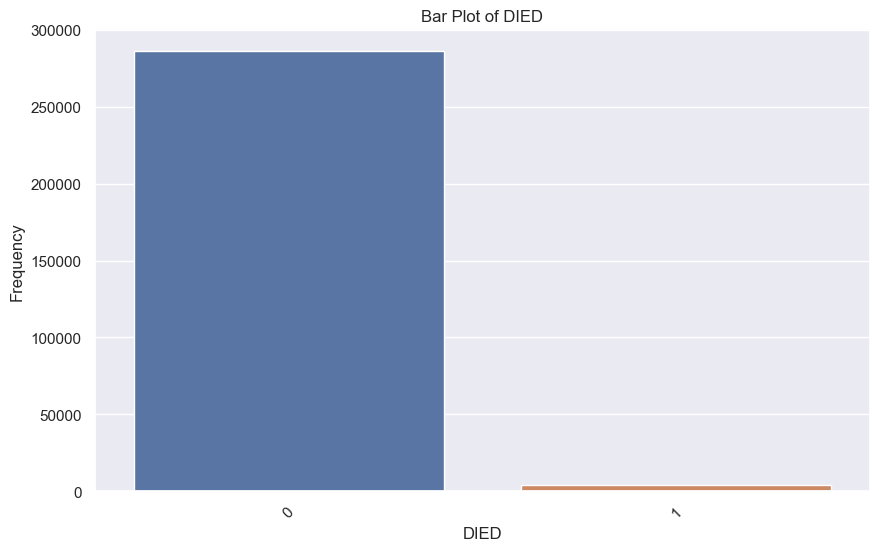

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
cat_cols=['DIED']
# Assuming cat_cols contains the names of categorical columns in your DataFrame

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate over each categorical column
for col in cat_cols:
    # Count the frequency of each category
    cat_counts = merged_data[col].value_counts()
    
    # Create a bar plot
    sns.barplot(x=cat_counts.index, y=cat_counts.values)
    
    # Set plot title and labels
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()


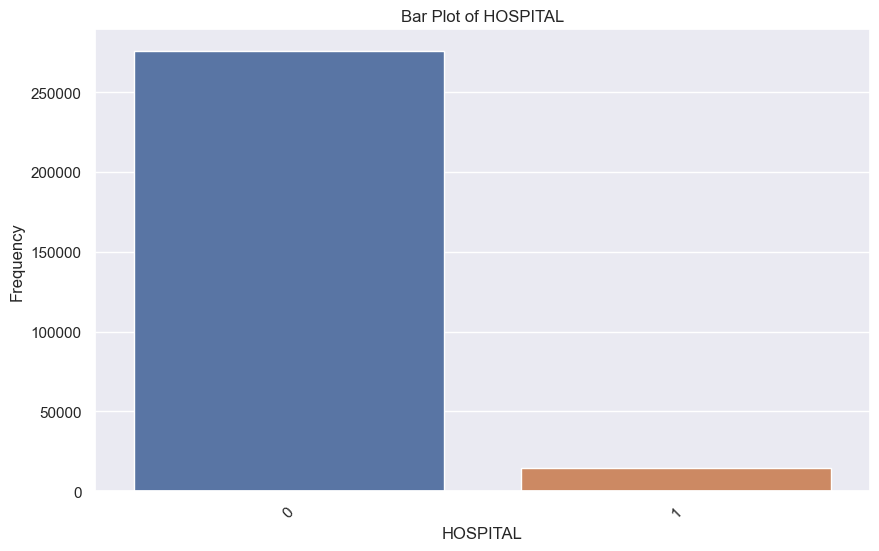

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
cat_cols=['HOSPITAL']
# Assuming cat_cols contains the names of categorical columns in your DataFrame

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate over each categorical column
for col in cat_cols:
    # Count the frequency of each category
    cat_counts = merged_data[col].value_counts()
    
    # Create a bar plot
    sns.barplot(x=cat_counts.index, y=cat_counts.values)
    
    # Set plot title and labels
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()


# creating the logic for Output Variable

In [30]:
# Preprocessing for Multiclass, Died and Hospitalized

def label_race (row):
   if row['HOSPITAL'] == 0 and row['DIED'] == 0:
      return '0'
   if row['HOSPITAL'] == 1 and row['DIED'] == 0 :
      return '1'
   if row['HOSPITAL'] == 0 and row['DIED'] == 1 :
      return '2'
   if row['HOSPITAL'] == 1 and row['DIED'] == 1 :
      return '3'

merged_data['Output_Label'] = merged_data.apply (lambda row: label_race(row), axis=1)

merged_data.drop(['DIED', 'HOSPITAL'], axis=1, inplace=True)

In [25]:

num_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['AGE_YRS', 'CAGE_YR', 'L_THREAT', 'ER_VISIT', 'HOSPDAYS', 'X_STAY',
       'DISABLE', 'NUMDAYS', 'FORM_VERS', 'BIRTH_DEFECT', 'ER_ED_VISIT'],
      dtype='object')

In [31]:
merged_data['Output_Label'].unique()

array(['0', '1', '3', '2'], dtype=object)

# Building Decision Tree Classifier

In [26]:
X = merged_data[num_cols]
y = merged_data['Output_Label']

In [89]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [90]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, training_target, test_target = train_test_split(X_sm, y_sm, test_size = 0.2, random_state= 45)

In [91]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

training_features = sc.fit_transform(training_features)

test_features = sc.transform(test_features)

In [92]:
from sklearn.dummy import DummyClassifier

dummy_baseline = DummyClassifier(strategy="most_frequent")

dummy_baseline.fit(test_features, test_target)

test_target_pred = dummy_baseline.predict(test_features)
print(test_target_pred)

['3' '3' '3' ... '3' '3' '3']


In [93]:
score = dummy_baseline.score(test_features, test_target)


print('The fraction of correct classifications is: {:5.3f}'.format(score))

The fraction of correct classifications is: 0.486


In [94]:
# from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix# DT Model

DT = DecisionTreeClassifier(criterion='entropy', random_state=45  , max_depth=5)


DT.fit(training_features, training_target)  # Training input and its Target variables


DT_Pred = DT.predict(test_features) # I already Know y_test  # 200 variables

# DT Confusion Matrix
CMTD = confusion_matrix(test_target,DT_Pred) # Compare the predicted target varaible to the orginal target variable


In [95]:
# Accuracy Score
ADT= accuracy_score(test_target, DT_Pred)

print(" Decision Tree Prediction Accuracy : {:.2f}%".format(ADT * 100))
# print()


 Decision Tree Prediction Accuracy : 91.73%


In [97]:
CMTD_N = confusion_matrix(test_target, DT_Pred)
TP = CMTD_N[1,1] # true positive
TN = CMTD_N[0,0] # true negatives
FP = CMTD_N[0,1] # false positives
FN = CMTD_N[1,0] # false negatives

testsensitivity= TP / float(TP+FN)
testspecificity= TN / float(TN+FP)

# Let us compare the values obtained for Train & Test:
print('On Test Data')
print('-'*30)
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))

On Test Data
------------------------------
Sensitivity : 35.87 %
Specificity : 100.0 %


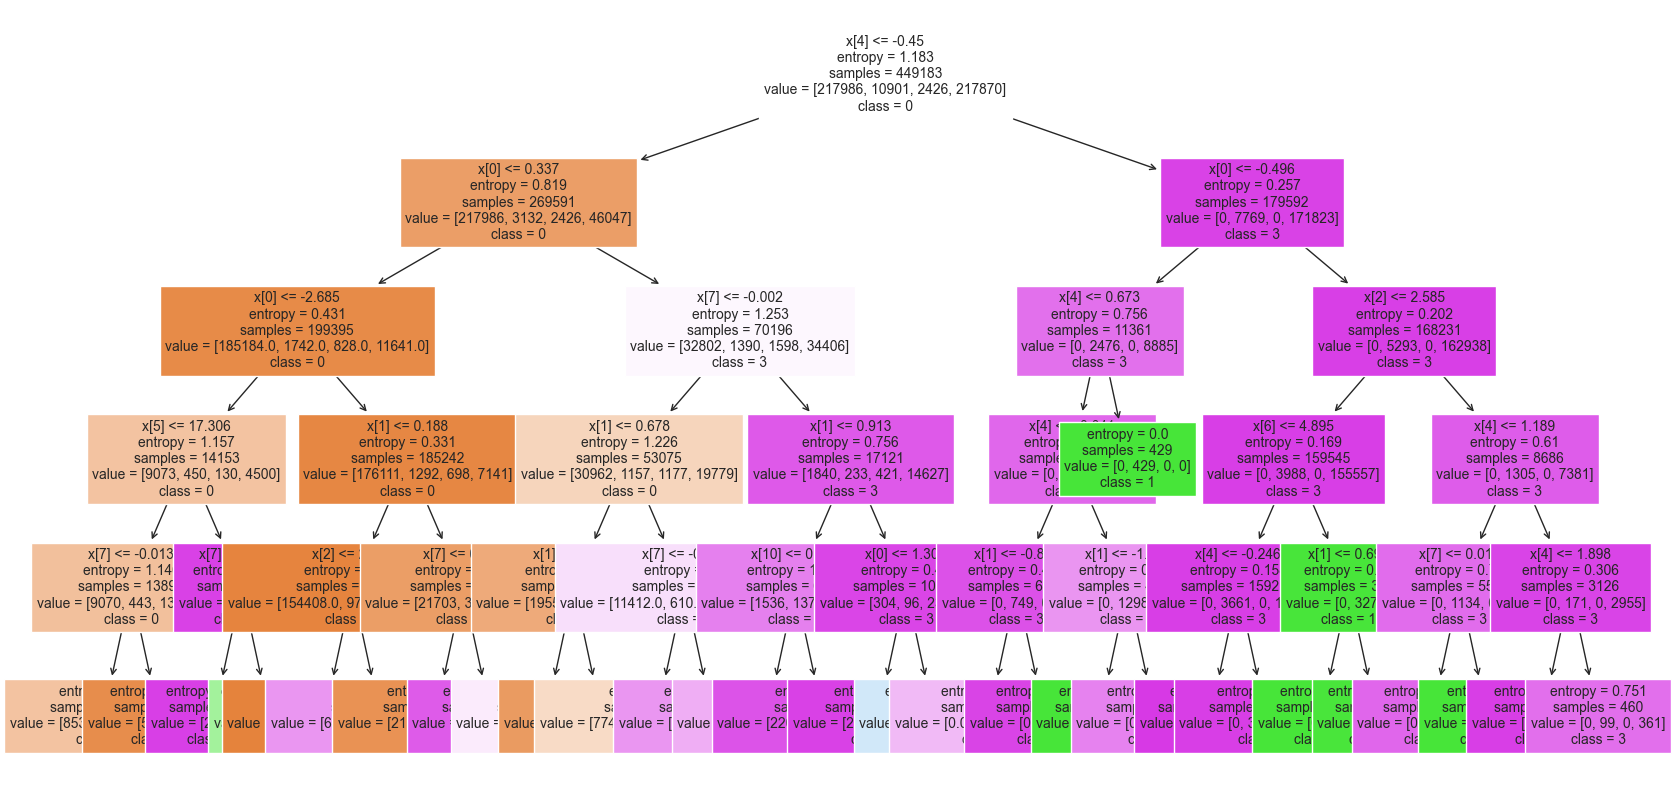

In [98]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming DT is your trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(DT, class_names=DT.classes_, filled=True, fontsize=10)  # Adjust fontsize as needed
plt.show()


In [24]:
cat_cols=['STATE','SEX', 'RECOVD','V_ADMINBY','VAX_TYPE','VAX_MANU','VAX_DOSE_SERIES','VAX_ROUTE','VAX_SITE','VAX_NAME']



In [25]:
merged_data = pd.get_dummies(merged_data, columns=cat_cols)

In [26]:
l=[]
l=merged_data.columns
l


Index(['AGE_YRS', 'CAGE_YR', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY',
       ...
       'VAX_SITE_LA', 'VAX_SITE_Other_VAX_SITE', 'VAX_SITE_RA', 'VAX_SITE_UN',
       'VAX_NAME_COVID19 (COVID19 (JANSSEN))',
       'VAX_NAME_COVID19 (COVID19 (MODERNA))',
       'VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH))',
       'VAX_NAME_Other_VAX_NAME',
       'VAX_NAME_VACCINE NOT SPECIFIED (NO BRAND NAME)',
       'VAX_NAME_ZOSTER (SHINGRIX)'],
      dtype='object', length=129)

In [109]:
original_string = "STATE_0,STATE_AK,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_FL,STATE_GA,STATE_HI, STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI, STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH, STATE_OK,STATE_OR,STATE_Other_STATE,STATE_PA,STATE_PR,STATE_SC,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_WA, STATE_WI,STATE_WV,SEX_F,SEX_M,SEX_U,RECOVD_0,RECOVD_N,RECOVD_U,RECOVD_Y,V_ADMINBY_MIL,V_ADMINBY_OTH,V_ADMINBY_PHM, V_ADMINBY_PUB,V_ADMINBY_PVT,V_ADMINBY_SCH,V_ADMINBY_SEN,V_ADMINBY_UNK,V_ADMINBY_WRK,VAX_TYPE_COVID19,VAX_TYPE_Other_VAX_TYPE, VAX_TYPE_UNK,VAX_TYPE_VARZOS,VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS,VAX_MANU_JANSSEN,VAX_MANU_MERCK & CO. INC.,VAX_MANU_MODERNA, VAX_MANU_Other_VAX_MANU,VAX_MANU_PFIZER\BIONTECH,VAX_MANU_SANOFI PASTEUR,VAX_MANU_UNKNOWN MANUFACTURER,VAX_DOSE_SERIES_1, VAX_DOSE_SERIES_2,VAX_DOSE_SERIES_Other_VAX_DOSE_SERIES,VAX_DOSE_SERIES_UNK,VAX_ROUTE_0,VAX_ROUTE_IM,VAX_ROUTE_OT, VAX_ROUTE_Other_VAX_ROUTE,VAX_ROUTE_SC,VAX_ROUTE_SYR,VAX_ROUTE_UN,VAX_SITE_0,VAX_SITE_AR,VAX_SITE_LA,VAX_SITE_Other_VAX_SITE, VAX_SITE_RA,VAX_SITE_UN,VAX_NAME_COVID19 (COVID19 (JANSSEN)),VAX_NAME_COVID19 (COVID19 (MODERNA)), VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH)), VAX_NAME_Other_VAX_NAME,VAX_NAME_VACCINE NOT SPECIFIED (NO BRAND NAME),VAX_NAME_ZOSTER (SHINGRIX)"

# Split the string by commas
items = original_string.split(',')

# Add single quotes to each item and join them back together with commas
quoted_items = [f"'{item.strip()}'" for item in items]

# Join the quoted items back together with commas
result_string = ', '.join(quoted_items)

print(result_string)


'STATE_0', 'STATE_AK', 'STATE_AL', 'STATE_AR', 'STATE_AZ', 'STATE_CA', 'STATE_CO', 'STATE_CT', 'STATE_FL', 'STATE_GA', 'STATE_HI', 'STATE_IA', 'STATE_ID', 'STATE_IL', 'STATE_IN', 'STATE_KS', 'STATE_KY', 'STATE_LA', 'STATE_MA', 'STATE_MD', 'STATE_ME', 'STATE_MI', 'STATE_MN', 'STATE_MO', 'STATE_MS', 'STATE_MT', 'STATE_NC', 'STATE_NE', 'STATE_NH', 'STATE_NJ', 'STATE_NM', 'STATE_NV', 'STATE_NY', 'STATE_OH', 'STATE_OK', 'STATE_OR', 'STATE_Other_STATE', 'STATE_PA', 'STATE_PR', 'STATE_SC', 'STATE_TN', 'STATE_TX', 'STATE_UT', 'STATE_VA', 'STATE_WA', 'STATE_WI', 'STATE_WV', 'SEX_F', 'SEX_M', 'SEX_U', 'RECOVD_0', 'RECOVD_N', 'RECOVD_U', 'RECOVD_Y', 'V_ADMINBY_MIL', 'V_ADMINBY_OTH', 'V_ADMINBY_PHM', 'V_ADMINBY_PUB', 'V_ADMINBY_PVT', 'V_ADMINBY_SCH', 'V_ADMINBY_SEN', 'V_ADMINBY_UNK', 'V_ADMINBY_WRK', 'VAX_TYPE_COVID19', 'VAX_TYPE_Other_VAX_TYPE', 'VAX_TYPE_UNK', 'VAX_TYPE_VARZOS', 'VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS', 'VAX_MANU_JANSSEN', 'VAX_MANU_MERCK & CO. INC.', 'VAX_MANU_MODERNA', 'VAX_MANU

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

n_col=['AGE_YRS', 'CAGE_YR', 'L_THREAT', 'ER_VISIT', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'NUMDAYS', 'FORM_VERS', 'BIRTH_DEFECT',  
       'ER_ED_VISIT',        'STATE_0', 'STATE_AK', 'STATE_AL', 'STATE_AR', 'STATE_AZ', 'STATE_CA', 'STATE_CO', 'STATE_CT',
         'STATE_FL', 'STATE_GA', 'STATE_HI', 'STATE_IA', 'STATE_ID', 'STATE_IL', 'STATE_IN', 'STATE_KS', 'STATE_KY', 'STATE_LA',
         'STATE_MA', 'STATE_MD', 'STATE_ME', 'STATE_MI', 'STATE_MN', 'STATE_MO', 'STATE_MS', 'STATE_MT', 'STATE_NC', 'STATE_NE',
         'STATE_NH', 'STATE_NJ', 'STATE_NM', 'STATE_NV', 'STATE_NY', 'STATE_OH', 'STATE_OK', 'STATE_OR', 'STATE_Other_STATE',
         'STATE_PA', 'STATE_PR', 'STATE_SC', 'STATE_TN', 'STATE_TX', 'STATE_UT', 'STATE_VA', 'STATE_WA', 'STATE_WI', 'STATE_WV',
         'SEX_F', 'SEX_M', 'SEX_U', 'RECOVD_0', 'RECOVD_N', 'RECOVD_U', 'RECOVD_Y', 'V_ADMINBY_MIL', 'V_ADMINBY_OTH',
         'V_ADMINBY_PHM', 'V_ADMINBY_PUB', 'V_ADMINBY_PVT', 'V_ADMINBY_SCH', 'V_ADMINBY_SEN', 'V_ADMINBY_UNK', 'V_ADMINBY_WRK', 
         'VAX_TYPE_COVID19', 'VAX_TYPE_Other_VAX_TYPE', 'VAX_TYPE_UNK', 'VAX_TYPE_VARZOS', 
         'VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS', 'VAX_MANU_JANSSEN', 'VAX_MANU_MERCK & CO. INC.', 'VAX_MANU_MODERNA', 
         'VAX_MANU_Other_VAX_MANU', 'VAX_MANU_PFIZER\BIONTECH', 'VAX_MANU_SANOFI PASTEUR', 'VAX_MANU_UNKNOWN MANUFACTURER', 
         'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', 'VAX_DOSE_SERIES_Other_VAX_DOSE_SERIES', 'VAX_DOSE_SERIES_UNK', 
         'VAX_ROUTE_0', 'VAX_ROUTE_IM', 'VAX_ROUTE_OT', 'VAX_ROUTE_Other_VAX_ROUTE', 'VAX_ROUTE_SC', 'VAX_ROUTE_SYR', 
         'VAX_ROUTE_UN', 'VAX_SITE_0', 'VAX_SITE_AR', 'VAX_SITE_LA', 'VAX_SITE_Other_VAX_SITE', 'VAX_SITE_RA', 'VAX_SITE_UN',
         'VAX_NAME_COVID19 (COVID19 (JANSSEN))', 'VAX_NAME_COVID19 (COVID19 (MODERNA))', 
         'VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH))', 'VAX_NAME_Other_VAX_NAME',
         'VAX_NAME_VACCINE NOT SPECIFIED (NO BRAND NAME)', 'VAX_NAME_ZOSTER (SHINGRIX)'
        
        ]
sc = StandardScaler()

training_features = sc.fit_transform(merged_data[n_col])

test_features = sc.transform(merged_data[n_col])



In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

NameError: name 'X' is not defined

In [122]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, training_target, test_target = train_test_split(X_sm, y_sm, test_size = 0.2, random_state= 45)

In [113]:
from sklearn.dummy import DummyClassifier

dummy_baseline = DummyClassifier(strategy="most_frequent")

dummy_baseline.fit(test_features, test_target)

test_target_pred = dummy_baseline.predict(test_features)
print(test_target_pred)

['3' '3' '3' ... '3' '3' '3']


In [114]:
score = dummy_baseline.score(test_features, test_target)
print('The fraction of correct classifications is: {:5.3f}'.format(score))

The fraction of correct classifications is: 0.486


In [115]:
# DT Model

DT = DecisionTreeClassifier(criterion='entropy', random_state=45  , max_depth=5)


DT.fit(training_features, training_target)  # Training input and its Target variables


DT_Pred = DT.predict(test_features) # I already Know y_test  # 200 variables

# DT Confusion Matrix
CMTD = confusion_matrix(test_target,DT_Pred) # Compare the predicted target varaible to the orginal target variable

In [116]:
# Accuracy Score
ADT= accuracy_score(test_target, DT_Pred)

print(" Decision Tree Prediction Accuracy : {:.2f}%".format(ADT * 100))
# print()


 Decision Tree Prediction Accuracy : 90.83%


In [117]:
CMTD_N = confusion_matrix(test_target, DT_Pred)
TP = CMTD_N[1,1] # true positive
TN = CMTD_N[0,0] # true negatives
FP = CMTD_N[0,1] # false positives
FN = CMTD_N[1,0] # false negatives

testsensitivity= TP / float(TP+FN)
testspecificity= TN / float(TN+FP)

# Let us compare the values obtained for Train & Test:
print('On Test Data')
print('-'*30)
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))

On Test Data
------------------------------
Sensitivity : 34.27 %
Specificity : 100.0 %


# Finding the most salient features for building complex models

In [118]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming train_X and train_y are your training features and target
# Define your model
model = LogisticRegression()

# Initialize Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=15)

# Fit RFE
rfe.fit(training_features, training_target)

# Selected features after backward elimination
selected_features = training_features.columns[rfe.support_]

# Removed features after backward elimination
removed_features = training_features.columns[~rfe.support_]

print("Selected features:", selected_features)
print("Removed features:", removed_features)


Selected features: Index(['AGE_YRS', 'CAGE_YR', 'L_THREAT', 'ER_VISIT', 'HOSPDAYS', 'X_STAY',
       'DISABLE', 'NUMDAYS', 'FORM_VERS', 'BIRTH_DEFECT', 'ER_ED_VISIT'],
      dtype='object')
Removed features: Index([], dtype='object')


In [32]:
n_col=['L_THREAT', 'HOSPDAYS', 'STATE_OR', 'SEX_F', 'SEX_M', 'SEX_U',
       'RECOVD_0', 'RECOVD_N', 'VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS',
       'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', 'VAX_DOSE_SERIES_UNK',
       'VAX_SITE_0', 'VAX_SITE_UN','AGE_YRS', 'CAGE_YR',  'ER_VISIT', 'X_STAY', 'DISABLE', 'NUMDAYS', 'FORM_VERS', 'BIRTH_DEFECT',  
       'ER_ED_VISIT',]


X = merged_data[n_col]
y = merged_data['Output_Label']

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [34]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
training_features, test_features, training_target, test_target = train_test_split(X_sm, y_sm, test_size = 0.25, random_state= 45)

In [35]:
from sklearn.dummy import DummyClassifier

dummy_baseline = DummyClassifier(strategy="most_frequent")

dummy_baseline.fit(test_features, test_target)

test_target_pred = dummy_baseline.predict(test_features)
print(test_target_pred)

['3' '3' '3' ... '3' '3' '3']


In [36]:
score = dummy_baseline.score(test_features, test_target)
print('The fraction of correct classifications is: {:5.3f}'.format(score))

The fraction of correct classifications is: 0.486


In [39]:
# DT Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


DT = DecisionTreeClassifier(criterion='entropy', random_state=45  , max_depth=5)


DT.fit(training_features, training_target)  # Training input and its Target variables


DT_Pred = DT.predict(test_features) # I already Know y_test  # 200 variables

# DT Confusion Matrix
CMTD = confusion_matrix(test_target,DT_Pred) # Compare the predicted target varaible to the orginal target variable


In [41]:
from sklearn.metrics import accuracy_score

# Accuracy Score
ADT= accuracy_score(test_target, DT_Pred)

print(" Decision Tree Prediction Accuracy : {:.2f}%".format(ADT * 100))
# print()


 Decision Tree Prediction Accuracy : 94.83%


In [42]:
CMTD_N = confusion_matrix(test_target, DT_Pred)
TP = CMTD_N[1,1] # true positive
TN = CMTD_N[0,0] # true negatives
FP = CMTD_N[0,1] # false positives
FN = CMTD_N[1,0] # false negatives

testsensitivity= TP / float(TP+FN)
testspecificity= TN / float(TN+FP)

# Let us compare the values obtained for Train & Test:
print('On Test Data')
print('-'*30)
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))

On Test Data
------------------------------
Sensitivity : 66.65 %
Specificity : 100.0 %


In [43]:
n_cols=['L_THREAT', 'HOSPDAYS', 'STATE_OR', 'SEX_F', 'SEX_M', 'SEX_U',
       'RECOVD_0', 'RECOVD_N', 'VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS',
       'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', 'VAX_DOSE_SERIES_UNK',
       'VAX_SITE_0', 'VAX_SITE_UN','AGE_YRS', 'CAGE_YR',  'ER_VISIT', 'X_STAY', 'DISABLE', 'NUMDAYS', 'FORM_VERS', 'BIRTH_DEFECT',  
       'ER_ED_VISIT',]
X = merged_data[n_cols]
X

,L_THREAT,HOSPDAYS,STATE_OR,SEX_F,SEX_M,SEX_U,RECOVD_0,RECOVD_N,VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS,VAX_DOSE_SERIES_1,...,VAX_SITE_UN,AGE_YRS,CAGE_YR,ER_VISIT,X_STAY,DISABLE,NUMDAYS,FORM_VERS,BIRTH_DEFECT,ER_ED_VISIT
0,0,0.0,False,True,False,False,False,False,False,True,...,False,33.0,33.0,0,0,0,2.0,2,0,0
1,0,0.0,False,True,False,False,False,False,False,True,...,False,73.0,73.0,0,0,0,0.0,2,0,0
2,0,0.0,False,True,False,False,False,False,False,True,...,False,23.0,23.0,0,0,0,0.0,2,0,1
3,0,0.0,False,True,False,False,False,False,False,False,...,False,58.0,58.0,0,0,0,0.0,2,0,0
4,0,0.0,False,True,False,False,False,True,False,True,...,False,47.0,47.0,0,0,0,7.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292214,0,0.0,False,True,False,False,False,False,False,True,...,False,63.0,62.0,0,0,0,0.0,2,0,1
292215,0,0.0,False,True,False,False,False,False,False,True,...,False,63.0,62.0,0,0,0,0.0,2,0,1
292216,0,0.0,False,False,True,False,False,False,False,False,...,False,59.0,58.0,0,0,0,1.0,2,0,0
292217,0,0.0,False,True,False,False,False,False,False,True,...,False,32.0,31.0,0,0,0,0.0,2,0,0


# Naive Bayes Model

In [78]:
n_cols=['L_THREAT', 'HOSPDAYS', 'STATE_OR', 'SEX_F', 'SEX_M', 'SEX_U',
       'RECOVD_0', 'RECOVD_N', 'VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS',
       'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', 'VAX_DOSE_SERIES_UNK',
       'VAX_SITE_0', 'VAX_SITE_UN','AGE_YRS', 'CAGE_YR',  'ER_VISIT', 'X_STAY', 'DISABLE', 'NUMDAYS', 'FORM_VERS', 'BIRTH_DEFECT',  
       'ER_ED_VISIT',]
# Assuming merged_data is your DataFrame containing the True/False values
merged_data[n_cols] = merged_data[n_cols].replace({True: 1, False: 0})
X = merged_data[n_cols]
import pandas as pd



y = merged_data['Output_Label']
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, training_target, test_target = train_test_split(X_sm, y_sm, test_size = 0.2, random_state= 45)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

training_features = sc.fit_transform(training_features)

test_features = sc.transform(test_features)


In [135]:
np.unique(training_target)

array(['0', '1', '2', '3'], dtype=object)

In [79]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the labels in test_target
test_target_encoded = label_encoder.fit_transform(test_target)

# Now, test_target_encoded contains numerical labels, and you can use it with confusion_matrix
#CMNB = confusion_matrix(test_target_encoded, NB_pred)


# Logistic Regression

 LGR Prediction Accuracy : 95.82%


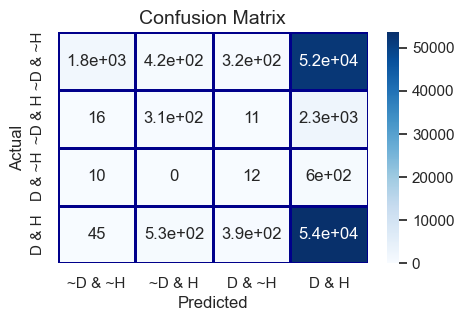

In [73]:
## Logistic Regression Model

from sklearn.linear_model import LogisticRegression

# Create the model using LogisticRegression class
LRModel = LogisticRegression(random_state = 42) # SEED

# Fitting the Model
LRModel.fit(training_features, training_target)

# Predicting the Test set results
LR_pred =LRModel.predict(test_features)

# Making the Confusion Matrix
CMLR= confusion_matrix(test_target, LR_pred)

# Accuracy Score
ACLR= accuracy_score(test_target, LR_pred )

print(" LGR Prediction Accuracy : {:.2f}%".format(ACLR * 100))

#PLotting the confusion matrix
target = 'Output_Label'
CMTD = pd.crosstab(test_target,NB_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,3))
sns.heatmap(CMTD,
            xticklabels=['~D & ~H', '~D & H', 'D & ~H', 'D & H'],
            yticklabels=['~D & ~H', '~D & H', 'D & ~H', 'D & H'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [74]:
CMTD_N = confusion_matrix(test_target, LR_pred)
TP = CMTD_N[1,1] # true positive
TN = CMTD_N[0,0] # true negatives
FP = CMTD_N[0,1] # false positives
FN = CMTD_N[1,0] # false negatives

testsensitivity= TP / float(TP+FN)
testspecificity= TN / float(TN+FP)

# Let us compare the values obtained for Train & Test:
print('On Test Data')
print('-'*30)
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))

On Test Data
------------------------------
Sensitivity : 65.23 %
Specificity : 99.93 %


# LGBM Classifier

In [ ]:
merged_data['Output_Label']

In [51]:
targetMap = merged_data['Output_Label']

n_cols=['L_THREAT', 'HOSPDAYS', 'AGE_YRS', 'CAGE_YR',  'ER_VISIT', 'X_STAY', 'DISABLE', 'NUMDAYS', 'FORM_VERS', 'BIRTH_DEFECT',  
       'ER_ED_VISIT',]


X = merged_data[n_cols]
y = merged_data['Output_Label']
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, training_target, test_target = train_test_split(X_sm, y_sm, test_size = 0.2, random_state= 45)

#

In [52]:
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier()


In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'num_leaves': [10, 20, 30],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(training_features, training_target)

best_params = grid_search.best_params_


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 359346, number of used features: 11
[LightGBM] [Info] Start training from score -0.723003
[LightGBM] [Info] Start training from score -3.718552
[LightGBM] [Info] Start training from score -5.221082
[LightGBM] [Info] Start training from score -0.723531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Nu

In [67]:
from sklearn.metrics import accuracy_score

lgb_model = lgb.LGBMClassifier(**best_params)
lgb_model.fit(training_features, training_target)

# Predictions on the test set
predictions = lgb_model.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_target, predictions)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 449183, number of used features: 11
[LightGBM] [Info] Start training from score -0.723000
[LightGBM] [Info] Start training from score -3.718576
[LightGBM] [Info] Start training from score -5.221187
[LightGBM] [Info] Start training from score -0.723532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [68]:
from sklearn.metrics import accuracy_score, recall_score

# Assuming you already have predictions and true target labels
# predictions = lgb_model.predict(test_features)
# test_target = true labels

# Calculate accuracy
accuracy = accuracy_score(test_target, predictions)
print("Accuracy:", accuracy)

# Calculate sensitivity (recall)
sensitivity = recall_score(test_target, predictions, average='weighted')  # Change 'weighted' to 'binary' or 'macro' depending on your needs





Accuracy: 0.9688145615159934


In [69]:
from sklearn.metrics import confusion_matrix

# Assuming 'test_target' contains the true labels and 'predictions' contains the predicted labels
# Calculate confusion matrix
conf_matrix = confusion_matrix(test_target, predictions)

# Iterate over each class index
for i in range(4):  # Assuming there are 4 classes (0, 1, 2, 3)
    TP = conf_matrix[i, i]
    
    # False positives for class i
    FP = sum(conf_matrix[:, i]) - TP
    
    # False negatives for class i
    FN = sum(conf_matrix[i, :]) - TP
    
    # True negatives for class i
    TN = conf_matrix.sum() - (TP + FP + FN)
    
    # Calculate sensitivity for class i
    sensitivity = TP / float(TP + FN)
    
    # Calculate specificity for class i
    specificity = TN / float(TN + FP)
    
    # Print sensitivity and specificity for class i
    print(f'Class {i}:')
    print(f'Sensitivity: {sensitivity:.2f}')
    print(f'Specificity: {specificity:.2f}')
    print('-' * 20)


Class 0:
Sensitivity: 0.99
Specificity: 0.96
--------------------
Class 1:
Sensitivity: 0.66
Specificity: 0.99
--------------------
Class 2:
Sensitivity: 0.11
Specificity: 1.00
--------------------
Class 3:
Sensitivity: 0.97
Specificity: 0.99
--------------------


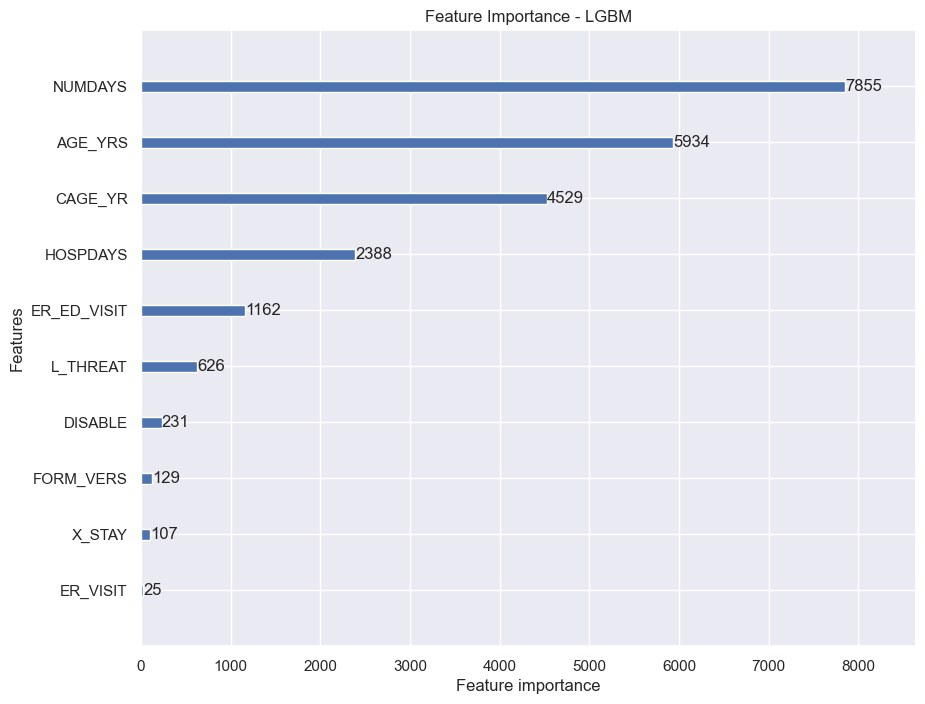

In [70]:
import lightgbm as lgb

# Assuming you have already trained the LGBM model and have access to it as 'lgb_model'
# Plot feature importance
lgb.plot_importance(lgb_model, figsize=(10, 8), max_num_features=10, importance_type='split')
plt.title("Feature Importance - LGBM")
plt.show()


# XGBOOST Classifier

In [71]:
from sklearn.preprocessing import LabelEncoder

# Initialize the XGBoost classifier with best parameters
xgb_model = XGBClassifier(**best_params)
label_encoder = LabelEncoder()
training_target_numeric = label_encoder.fit_transform(training_target)

label_encoder = LabelEncoder()
test_target_numeric = label_encoder.fit_transform(test_target)


# Now, the target variable `training_target_numeric` contains numeric values
# Fit the model on the training data
xgb_model.fit(training_features, training_target_numeric)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_leaves=30,
              num_parallel_tree=None, ...)

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Predictions on the test set
predictions = xgb_model.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_target_numeric, predictions)
print("Accuracy:", accuracy)

from sklearn.metrics import recall_score

# Calculate recall (sensitivity)
recall = recall_score(test_target_numeric, predictions, average='weighted')

# Print the recall
print("Recall (Sensitivity):", recall)



Accuracy: 0.9724121963382489
Recall (Sensitivity): 0.9724121963382489


In [65]:
from sklearn.metrics import confusion_matrix

# Convert predictions to string type
predictions_str = predictions.astype(str)

# Calculate confusion matrix
CMTD_N = confusion_matrix(test_target, predictions_str)

# Calculate true positives and true negatives
TP = CMTD_N[1, 1]  # true positive
TN = CMTD_N[0, 0]  # true negatives

testsensitivity= TP / float(TP+FN)
testspecificity= TN / float(TN+FP)

# Let us compare the values obtained for Train & Test:
print('On Test Data')
print('-'*30)
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))


On Test Data
------------------------------
Sensitivity : 74.93 %
Specificity : 99.9 %


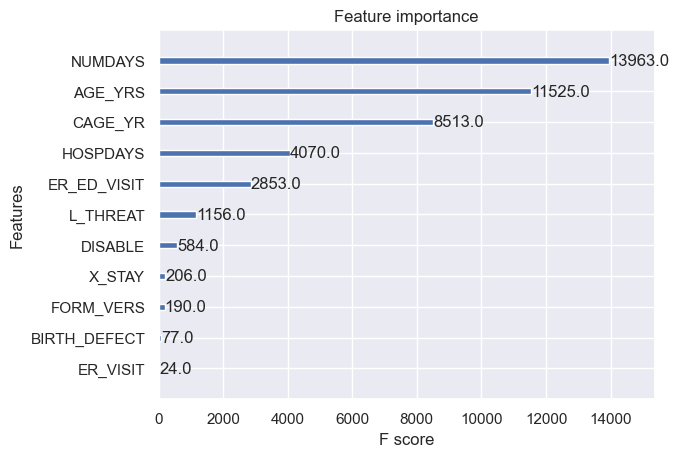

In [51]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Assuming you have already trained the XGBoost model and have access to it as 'xgb_model'

# Plot feature importance
plot_importance(xgb_model)
plt.show()


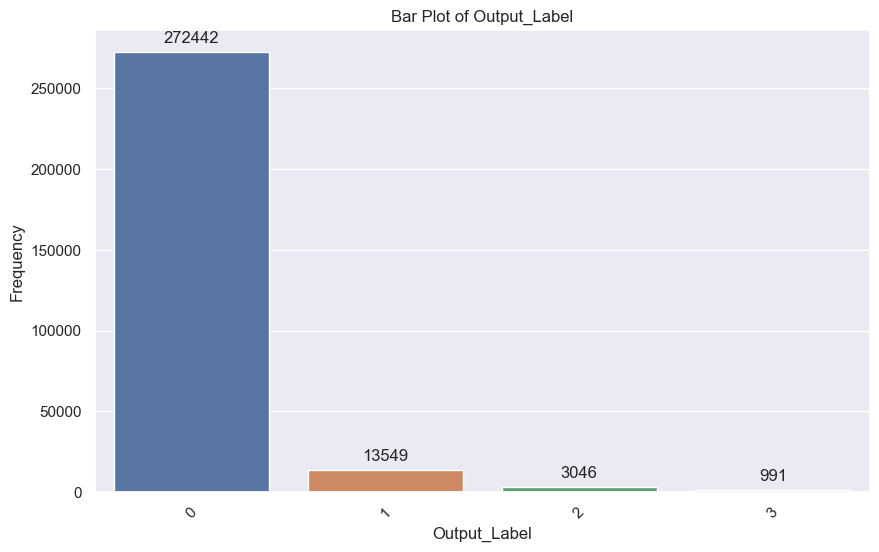

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols=['Output_Label']

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate over each categorical column
for col in cat_cols:
    # Count the frequency of each category
    cat_counts = merged_data[col].value_counts()
    
    # Create a bar plot
    ax = sns.barplot(x=cat_counts.index, y=cat_counts.values)
    
    # Annotate the count above each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
    
    # Set plot title and labels
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()


In [74]:
targetMap = merged_data['Output_Label']

n_cols=['L_THREAT', 'HOSPDAYS', 'STATE_OR', 'SEX_F', 'SEX_M', 'SEX_U',
       'RECOVD_0', 'RECOVD_N', 'VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS',
       'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', 'VAX_DOSE_SERIES_UNK',
       'VAX_SITE_0', 'VAX_SITE_UN','AGE_YRS', 'CAGE_YR',  'ER_VISIT', 'X_STAY', 'DISABLE', 'NUMDAYS', 'FORM_VERS', 'BIRTH_DEFECT',  
       'ER_ED_VISIT',]


X = merged_data[n_cols]
y = merged_data['Output_Label']
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, training_target, test_target = train_test_split(X_sm, y_sm, test_size = 0.2, random_state= 45)

#

In [75]:
from sklearn.metrics import accuracy_score

lgb_model = lgb.LGBMClassifier(**best_params)
lgb_model.fit(training_features, training_target)

# Predictions on the test set
predictions = lgb_model.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_target, predictions)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 449183, number of used features: 23
[LightGBM] [Info] Start training from score -0.723000
[LightGBM] [Info] Start training from score -3.718576
[LightGBM] [Info] Start training from score -5.221187
[LightGBM] [Info] Start training from score -0.723532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [76]:
from sklearn.metrics import accuracy_score, recall_score

# Assuming you already have predictions and true target labels
# predictions = lgb_model.predict(test_features)
# test_target = true labels

# Calculate accuracy
accuracy = accuracy_score(test_target, predictions)
print("Accuracy:", accuracy)

# Calculate sensitivity (recall)
sensitivity = recall_score(test_target, predictions, average='weighted')  # Change 'weighted' to 'binary' or 'macro' depending on your needs





Accuracy: 0.9813706632471326


In [77]:
from sklearn.metrics import confusion_matrix

# Assuming 'test_target' contains the true labels and 'predictions' contains the predicted labels
# Calculate confusion matrix
conf_matrix = confusion_matrix(test_target, predictions)

# Iterate over each class index
for i in range(4):  # Assuming there are 4 classes (0, 1, 2, 3)
    TP = conf_matrix[i, i]
    
    # False positives for class i
    FP = sum(conf_matrix[:, i]) - TP
    
    # False negatives for class i
    FN = sum(conf_matrix[i, :]) - TP
    
    # True negatives for class i
    TN = conf_matrix.sum() - (TP + FP + FN)
    
    # Calculate sensitivity for class i
    sensitivity = TP / float(TP + FN)
    
    # Calculate specificity for class i
    specificity = TN / float(TN + FP)
    
    # Print sensitivity and specificity for class i
    print(f'Class {i}:')
    print(f'Sensitivity: {sensitivity:.2f}')
    print(f'Specificity: {specificity:.2f}')
    print('-' * 20)


Class 0:
Sensitivity: 1.00
Specificity: 0.98
--------------------
Class 1:
Sensitivity: 0.70
Specificity: 1.00
--------------------
Class 2:
Sensitivity: 0.15
Specificity: 1.00
--------------------
Class 3:
Sensitivity: 0.99
Specificity: 0.99
--------------------


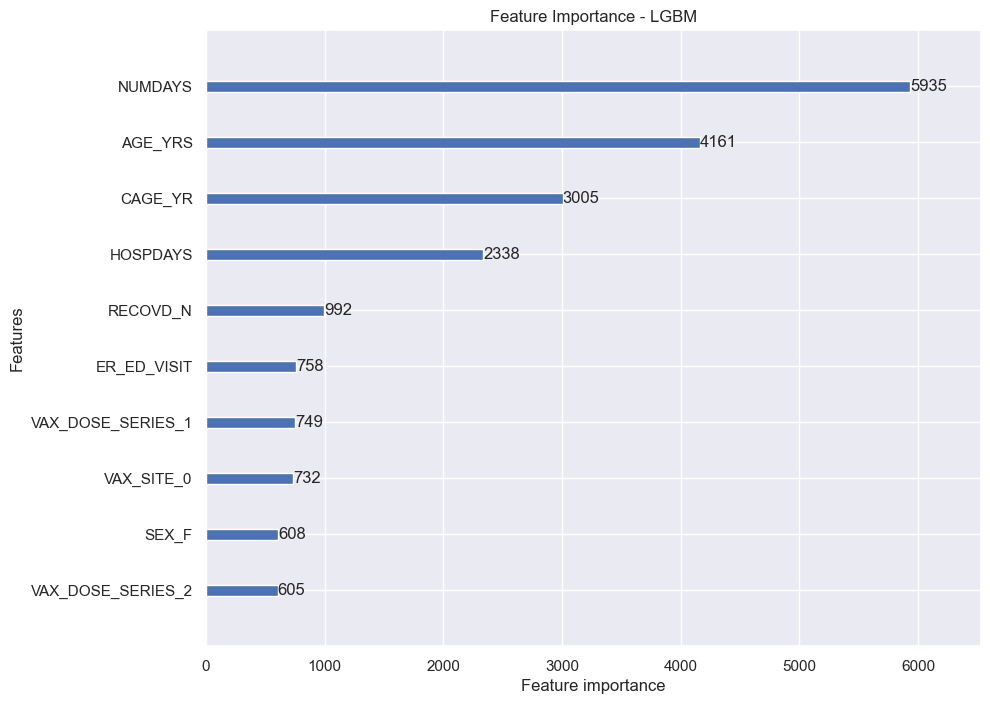

In [83]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming you have already trained the LGBM model and have access to it as 'lgb_model'
# Plot feature importance
lgb.plot_importance(lgb_model, figsize=(10, 8), max_num_features=10, importance_type='split')
plt.title("Feature Importance - LGBM")
plt.show()


# NAIVE BAYES

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define the features and target variable
n_cols = ['L_THREAT', 'HOSPDAYS', 'STATE_OR', 'SEX_F', 'SEX_M', 'SEX_U',
          'RECOVD_0', 'RECOVD_N', 'VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS',
          'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', 'VAX_DOSE_SERIES_UNK',
          'VAX_SITE_0', 'VAX_SITE_UN','AGE_YRS', 'CAGE_YR',  'ER_VISIT', 'X_STAY', 'DISABLE', 'NUMDAYS', 'FORM_VERS', 'BIRTH_DEFECT',  
          'ER_ED_VISIT']

X = merged_data[n_cols]
y = merged_data['Output_Label']

# Handle class imbalance
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
training_features, test_features, training_target, test_target = train_test_split(X_sm, y_sm, test_size=0.2, random_state=45)

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(training_features, training_target)

# Make predictions
predictions = nb_model.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_target, predictions)
conf_matrix = confusion_matrix(test_target, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8499679418679205
Confusion Matrix:
[[43458   444   185 10369]
 [  251   352     8  2037]
 [  148     2    10   460]
 [ 2114   523   307 51628]]


In [85]:
from sklearn.metrics import confusion_matrix

# Assuming 'test_target' contains the true labels and 'predictions' contains the predicted labels
# Calculate confusion matrix
conf_matrix = confusion_matrix(test_target, predictions)

# Iterate over each class index
for i in range(4):  # Assuming there are 4 classes (0, 1, 2, 3)
    TP = conf_matrix[i, i]
    
    # False positives for class i
    FP = sum(conf_matrix[:, i]) - TP
    
    # False negatives for class i
    FN = sum(conf_matrix[i, :]) - TP
    
    # True negatives for class i
    TN = conf_matrix.sum() - (TP + FP + FN)
    
    # Calculate sensitivity for class i
    sensitivity = TP / float(TP + FN)
    
    # Calculate specificity for class i
    specificity = TN / float(TN + FP)
    
    # Print sensitivity and specificity for class i
    print(f'Class {i}:')
    print(f'Sensitivity: {sensitivity:.2f}')
    print(f'Specificity: {specificity:.2f}')
    print('-' * 20)


Class 0:
Sensitivity: 0.80
Specificity: 0.96
--------------------
Class 1:
Sensitivity: 0.13
Specificity: 0.99
--------------------
Class 2:
Sensitivity: 0.02
Specificity: 1.00
--------------------
Class 3:
Sensitivity: 0.95
Specificity: 0.78
--------------------
